<a href="https://colab.research.google.com/github/Deveshrai02/EDA_Feature_Engineering_Learning/blob/main/Kaggle_Dataset_EDA_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on the data set which have all the user data of kaggle , I am trying to analyze the data and find out what are the key factors that leads to some datasets go in trending while others are not properly highlighted. I will be building the best model that will predict which of the upcoming datasets will have the probability to become the trend-master

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('sample_data/kaggle_success_factors.csv')
df.sample(3)

,content_id,content_type,title,author_username,author_tier,author_followers,author_notebooks_count,author_datasets_count,primary_topic,all_topics,...,uses_gpu,file_size_mb,usability_score,file_format,column_count,row_count,license_type,engagement_rate,virality_score,quality_score
50757,nb_d4bf5e2f,notebook,Titanic Prediction using ML,rileypro645,Novice,11,4,5,Titanic,Titanic,...,False,3.24,NaN,NaN,NaN,NaN,NaN,1.81,0.2,29.4
61526,nb_9ff2683c,notebook,Healthcare Prediction using ML,learn_master,Expert,145,3,6,Healthcare,Healthcare,...,True,7.21,NaN,NaN,NaN,NaN,NaN,6.05,33.3,51.9
74079,ds_a4ab8f4c,dataset,Real-world Healthcare Data,vizpro,Novice,67,26,3,Healthcare,Healthcare|LightGBM|GPT,...,NaN,35.88,9.1,Parquet,16.0,29302.0,CC BY-NC-SA,7.04,1.5,61.4


In [3]:
df.shape

(100000, 40)

Getting to know the contents and dtype of each column


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   content_id              100000 non-null  object 
 1   content_type            100000 non-null  object 
 2   title                   100000 non-null  object 
 3   author_username         100000 non-null  object 
 4   author_tier             100000 non-null  object 
 5   author_followers        100000 non-null  int64  
 6   author_notebooks_count  100000 non-null  int64  
 7   author_datasets_count   100000 non-null  int64  
 8   primary_topic           100000 non-null  object 
 9   all_topics              100000 non-null  object 
 10  programming_language    100000 non-null  object 
 11  is_competition_related  100000 non-null  bool   
 12  created_date            100000 non-null  object 
 13  last_updated            100000 non-null  object 
 14  days_since_creation  

In [5]:
df.describe()

,author_followers,author_notebooks_count,author_datasets_count,days_since_creation,update_count,views,upvotes,comments_count,fork_count,downloads,...,code_lines,markdown_ratio,visualization_count,file_size_mb,usability_score,column_count,row_count,engagement_rate,virality_score,quality_score
count,75417.000000,75417.000000,75417.000000,75417.000000,75417.000000,7.541700e+04,75417.000000,75417.000000,75417.000000,75417.000000,...,52594.000000,52594.000000,52594.000000,75417.000000,22823.000000,22823.000000,2.282300e+04,75417.000000,75417.000000,75417.000000
mean,388.044473,12.368577,4.665301,1279.326306,40.247716,3.687166e+03,25.139345,2.687418,17.224923,98.276436,...,203.815302,0.424666,2.870327,48.648046,5.340323,19.424265,1.643211e+05,3.621695,1.204190,28.587272
std,1134.693207,21.838869,8.801884,737.933918,70.617521,1.783779e+04,163.333104,21.669358,155.806223,1589.560510,...,194.097643,0.165474,2.335907,446.096864,2.268652,24.978656,1.299610e+06,5.658350,6.081688,16.005135
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.100000,0.000000,0.010000,1.000000,2.000000,1.000000e+02,0.000000,0.000000,0.000000
25%,59.000000,3.000000,1.000000,642.000000,0.000000,1.490000e+02,0.000000,0.000000,0.000000,0.000000,...,86.000000,0.298000,1.000000,1.650000,3.600000,6.000000,5.630000e+03,0.000000,0.000000,16.100000
50%,142.000000,7.000000,2.000000,1281.000000,10.000000,5.740000e+02,1.000000,0.000000,0.000000,0.000000,...,148.000000,0.422000,2.000000,3.740000,5.500000,12.000000,2.201200e+04,1.260000,0.100000,26.400000
75%,355.000000,13.000000,5.000000,1920.000000,40.000000,2.120000e+03,8.000000,0.000000,3.000000,1.000000,...,253.000000,0.554000,4.000000,10.520000,7.200000,23.000000,8.575350e+04,5.070000,0.400000,38.900000
max,105191.000000,811.000000,320.000000,2556.000000,365.000000,1.919355e+06,9552.000000,1388.000000,19109.000000,274712.000000,...,6267.000000,0.700000,17.000000,34450.160000,10.000000,500.000000,1.000000e+08,77.140000,100.000000,92.100000


In [ ]:
df['is_trending'].value_counts()

,count
is_trending,
False,99981
True,19


In [ ]:
df['is_featured'].value_counts()

,count
is_featured,
False,99674
True,326


In [13]:
df.isnull().mean()

,0
content_id,0.00000
content_type,0.00000
title,0.00000
author_username,0.00000
author_tier,0.00000
author_followers,0.00000
author_notebooks_count,0.00000
author_datasets_count,0.00000
primary_topic,0.00000
all_topics,0.00000


In [15]:
df['medal'].value_counts()

,count
medal,
Bronze,6832
Silver,1082
Gold,41


There are 12 columns with missing values , now these missing values might not be random , it can directly impact the categorization of a dataset being trending or not . For ex - Medal column , there will be users with no medals and it might have been entered in dataset as null value but that null value is not random , it is one of the important feature that can be helpful in labelling. Hence before doing any further imputing lets create a flag to denote missing values true/false for every row

In [8]:
df.shape

(100000, 40)

In [ ]:
df["medal_missing"].value_counts()

,count
medal_missing,
1,92045
0,7955


In [17]:
df.duplicated().sum()

np.int64(0)

Dropping content id as no impact on outcome

In [4]:
df= df.drop('content_id' , axis =1 )

In [5]:
df.shape

(100000, 39)

Converting bool cols as 0/1


In [9]:
bool_cols = df.select_dtypes(include=['bool']).columns
for col in bool_cols:
    df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   content_type            100000 non-null  object 
 1   title                   100000 non-null  object 
 2   author_username         100000 non-null  object 
 3   author_tier             100000 non-null  object 
 4   author_followers        100000 non-null  int64  
 5   author_notebooks_count  100000 non-null  int64  
 6   author_datasets_count   100000 non-null  int64  
 7   primary_topic           100000 non-null  object 
 8   all_topics              100000 non-null  object 
 9   programming_language    100000 non-null  object 
 10  is_competition_related  100000 non-null  int64  
 11  created_date            100000 non-null  object 
 12  last_updated            100000 non-null  object 
 13  days_since_creation     100000 non-null  int64  
 14  update_count         

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_with_trending = df[numeric_cols].corrwith(df['is_trending'])
display(correlation_with_trending.sort_values(ascending=False))

,0
is_trending,1.000000
virality_score,0.147189
engagement_rate,0.058223
quality_score,0.026779
visualization_count,0.026559
comments_count,0.007125
upvotes,0.006889
notebook_usage,0.006330
downloads,0.006272
usability_score,0.005015


In [ ]:
df['virality_score'].describe()

,virality_score
count,100000.000000
mean,1.223701
std,6.218154
min,0.000000
25%,0.000000
50%,0.100000
75%,0.400000
max,100.000000


In [13]:
sample_df = df.sample(n=10000, random_state=42)

In [14]:
sample_df.shape

(10000, 39)

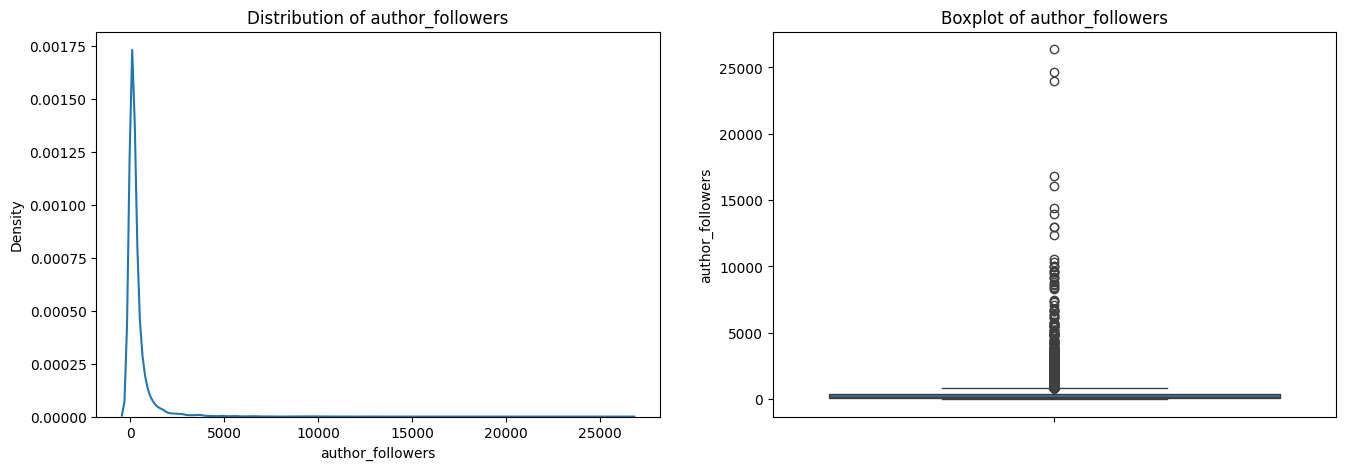

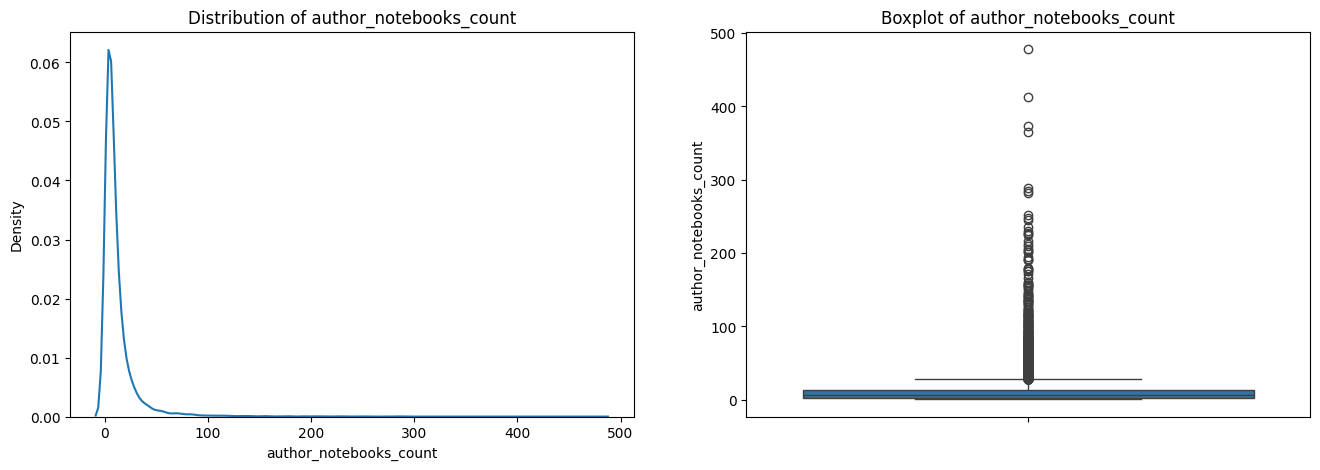

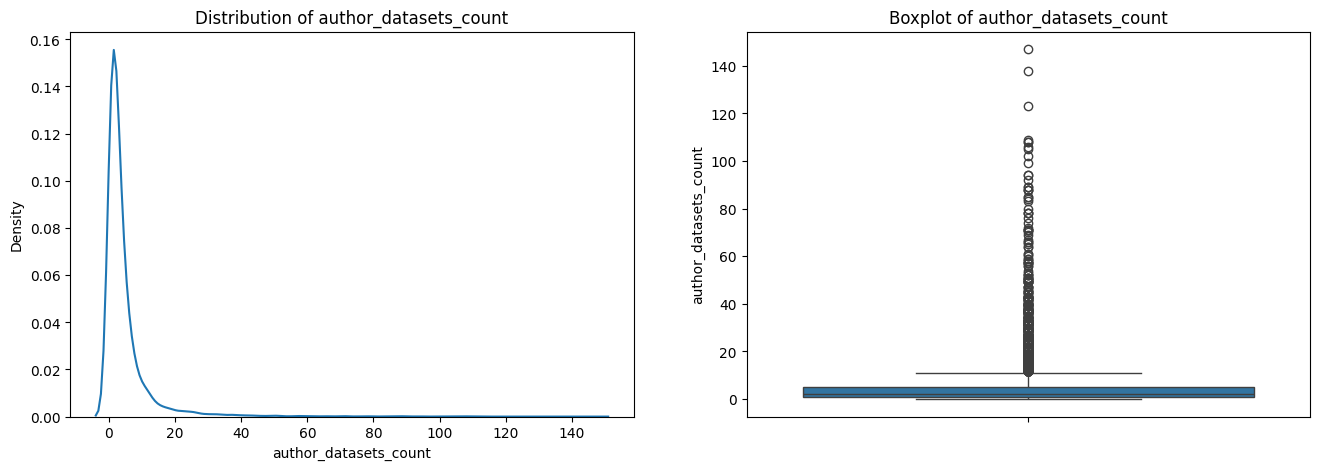

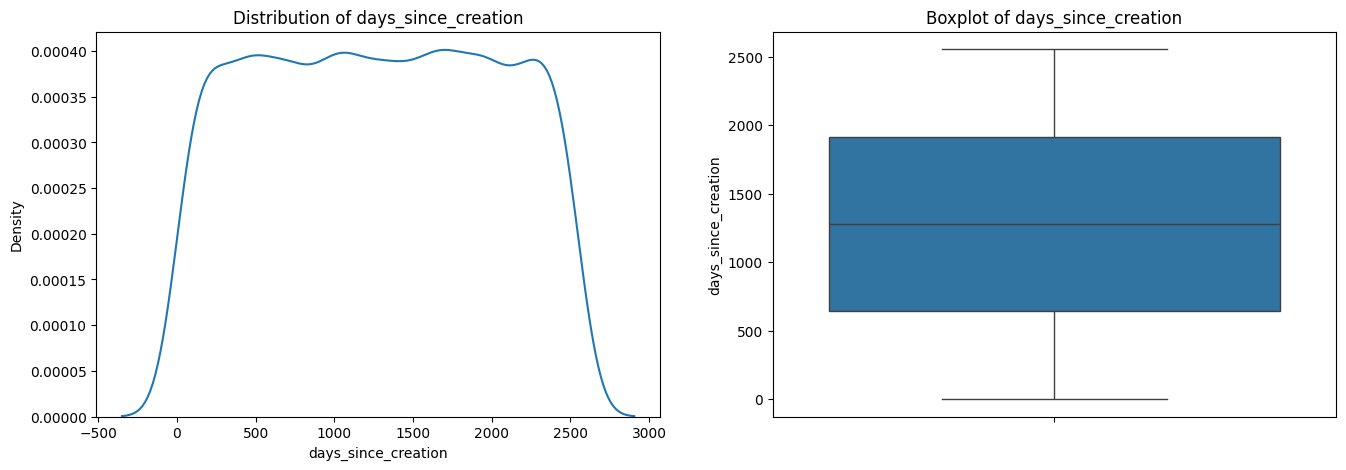

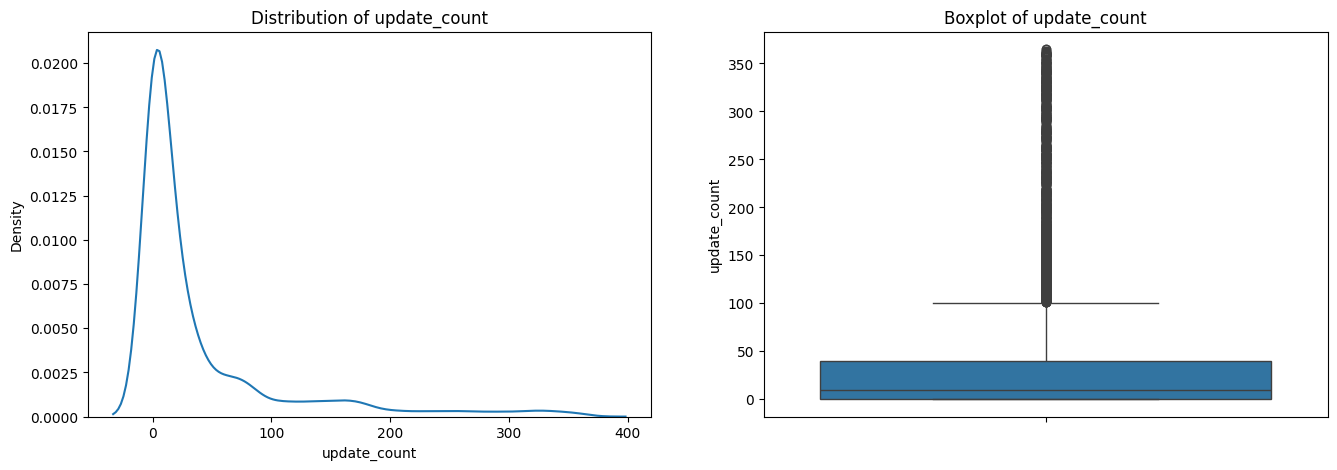

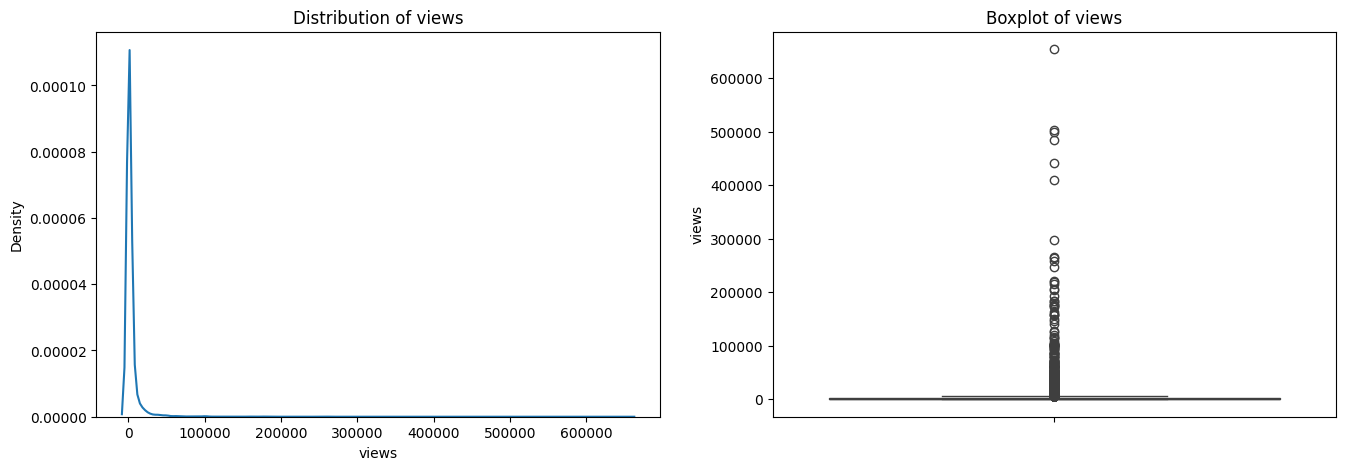

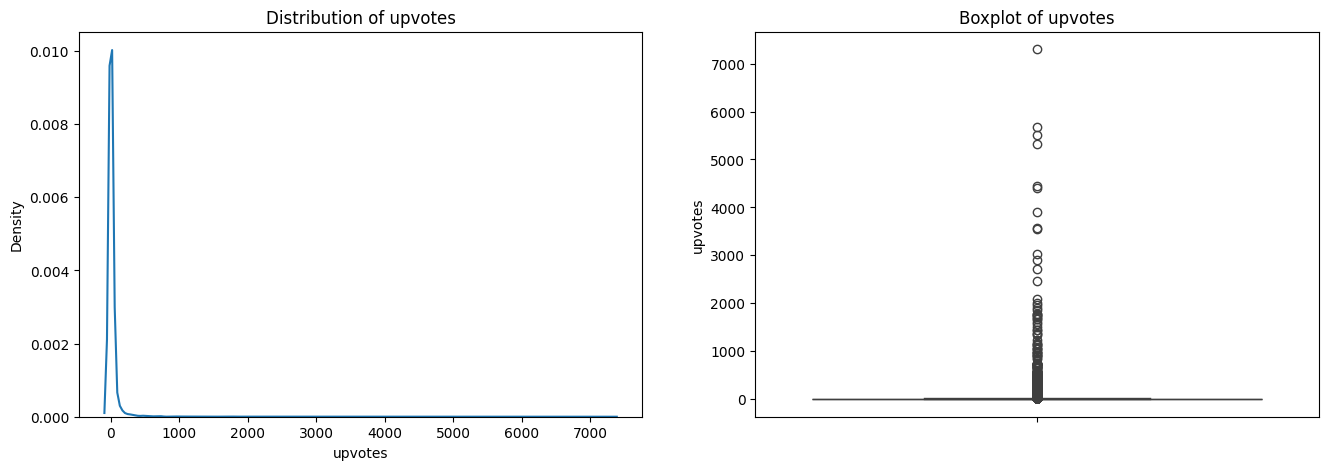

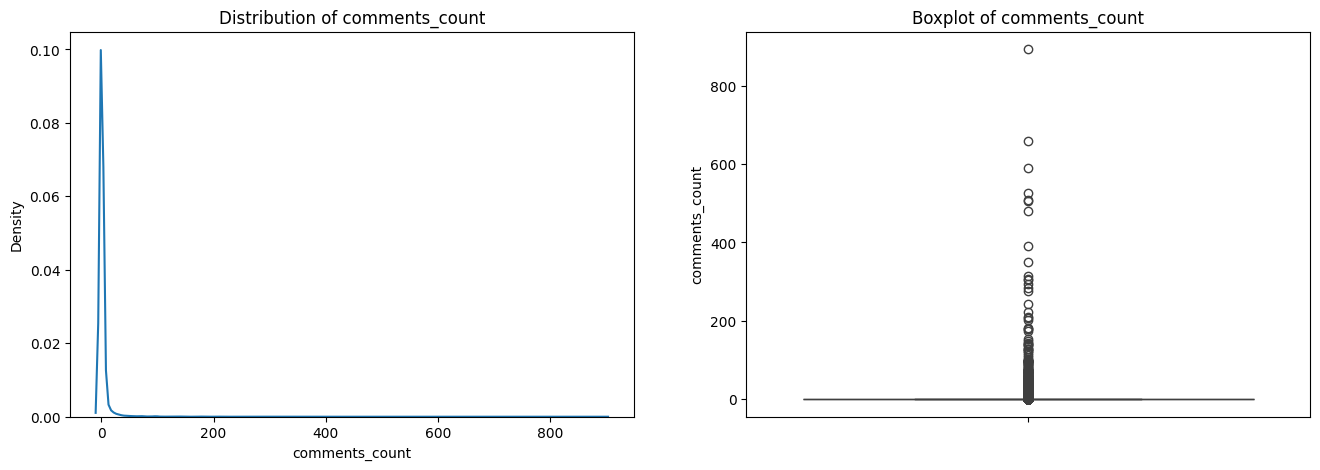

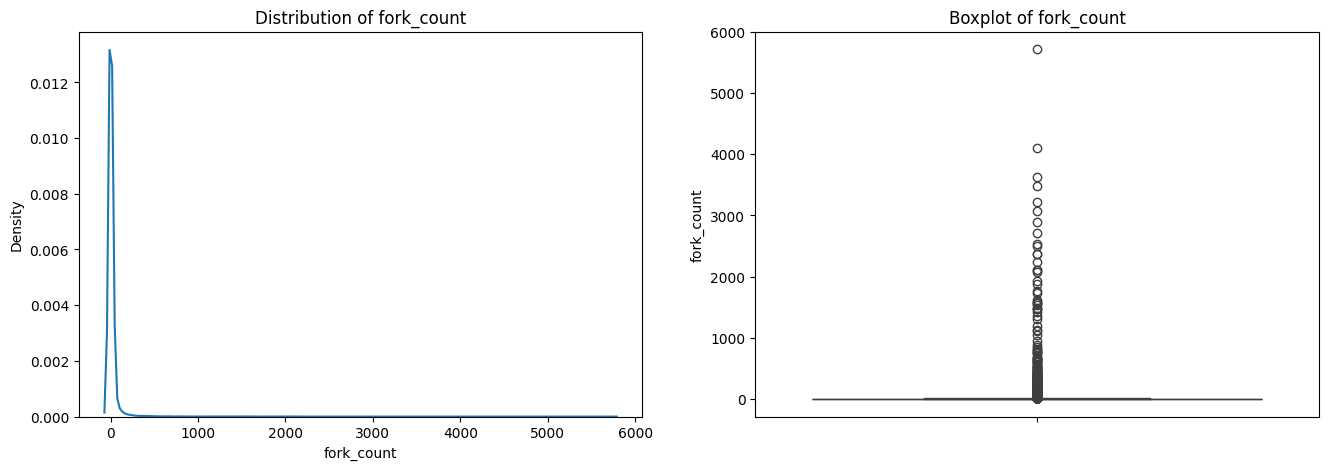

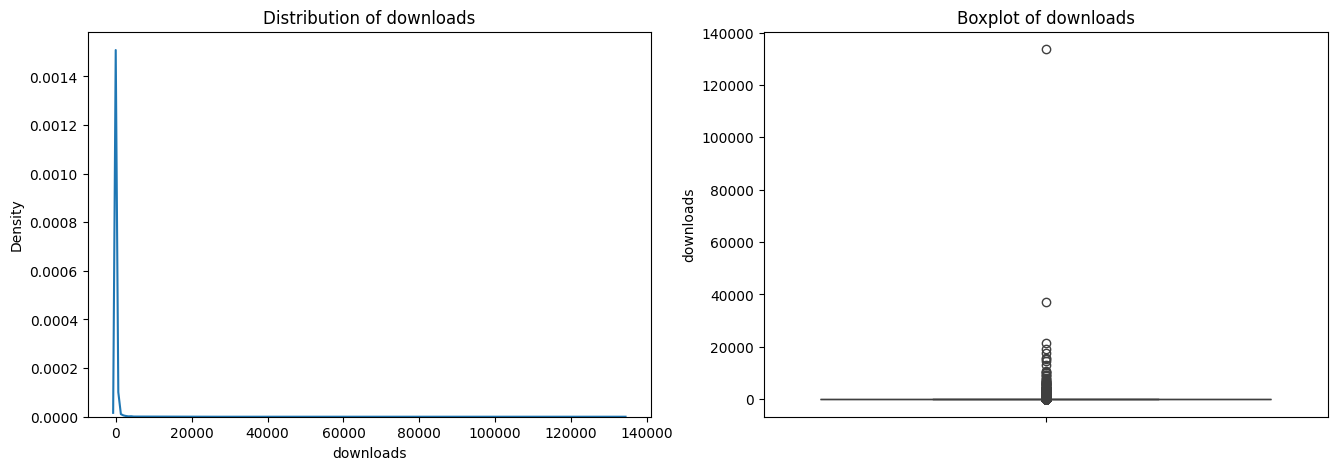

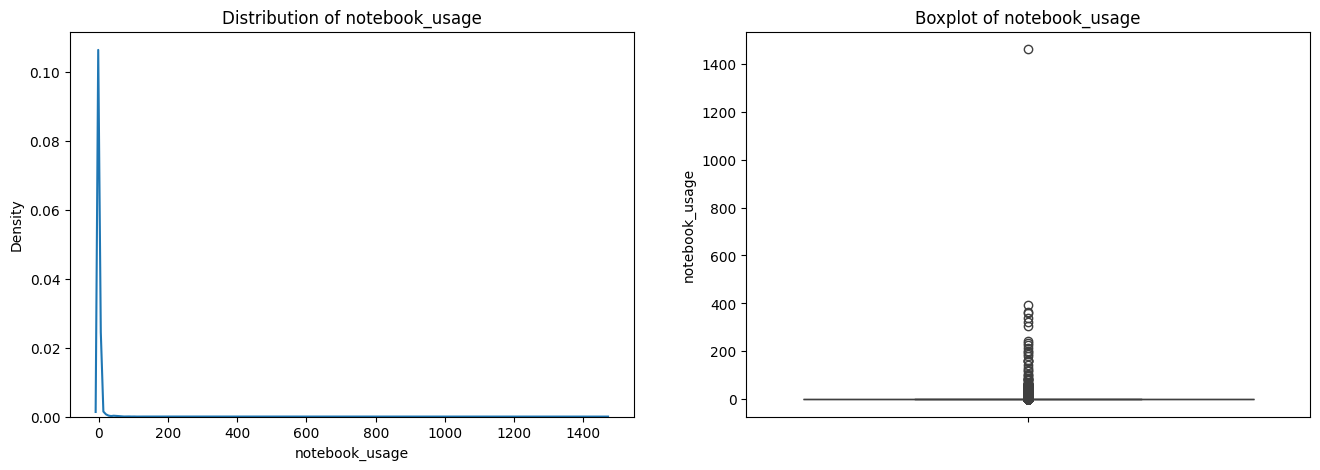

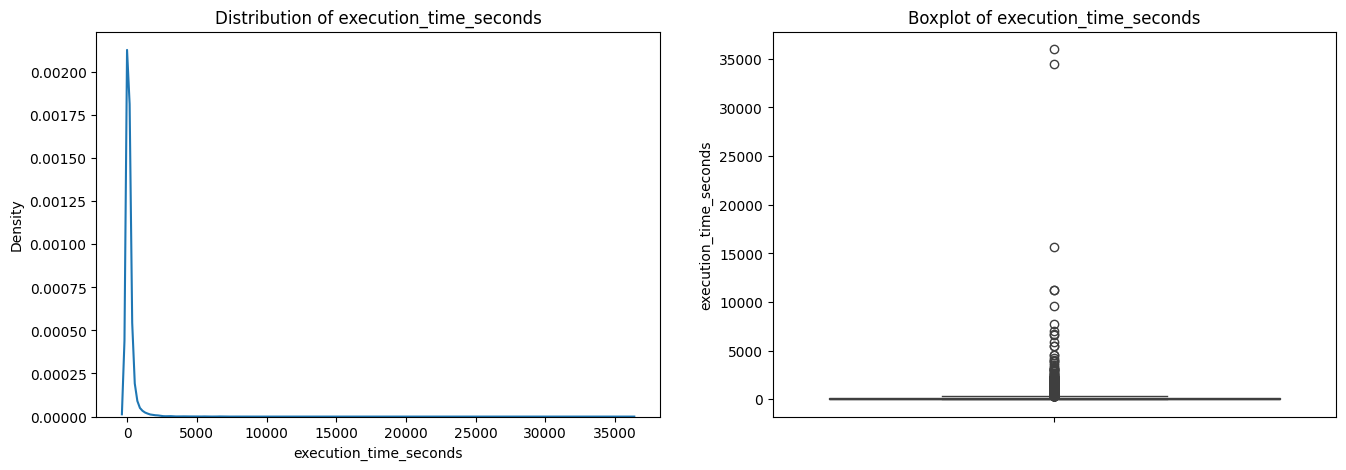

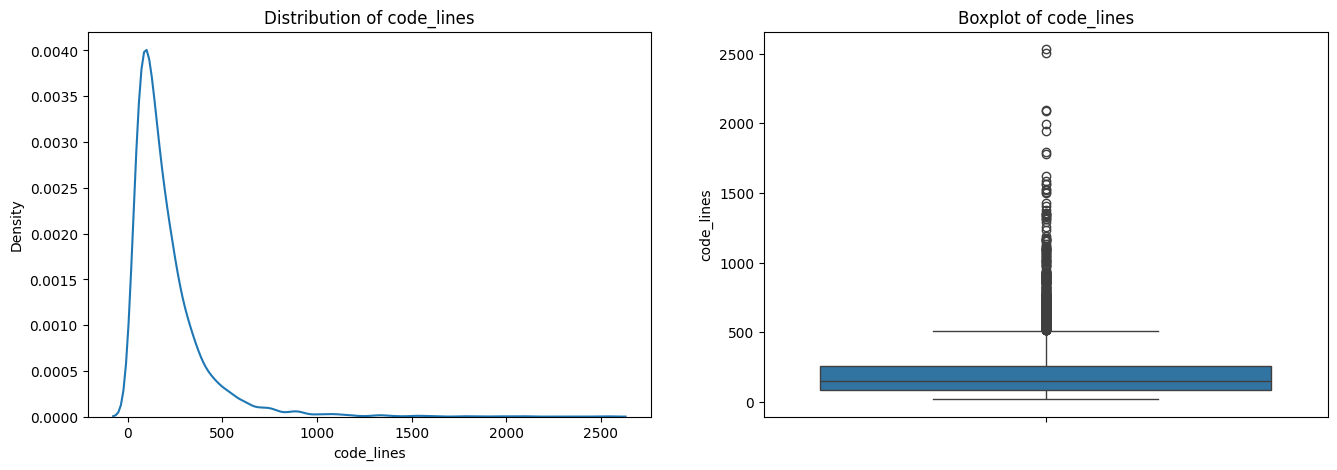

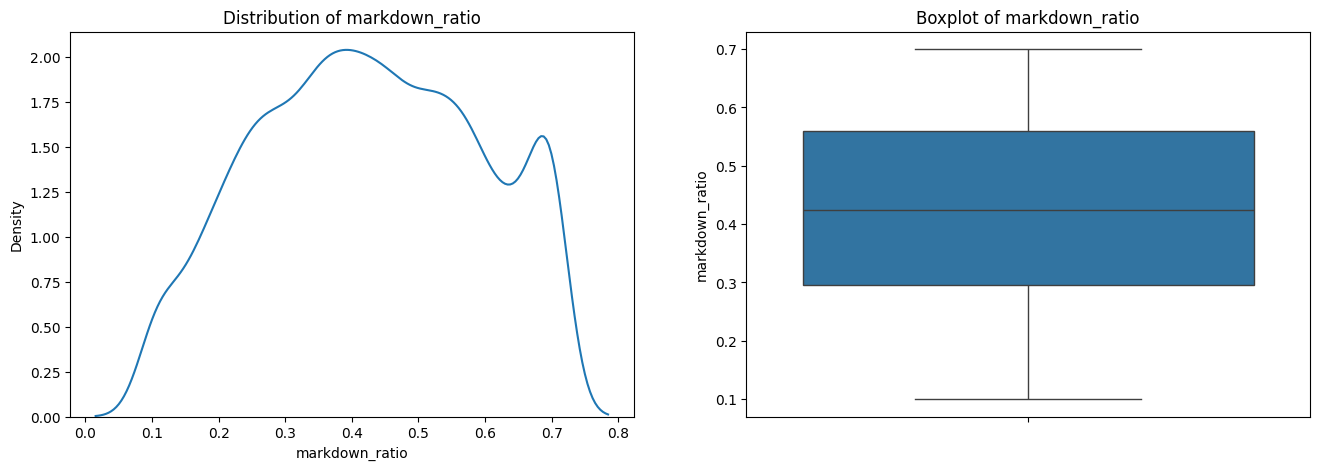

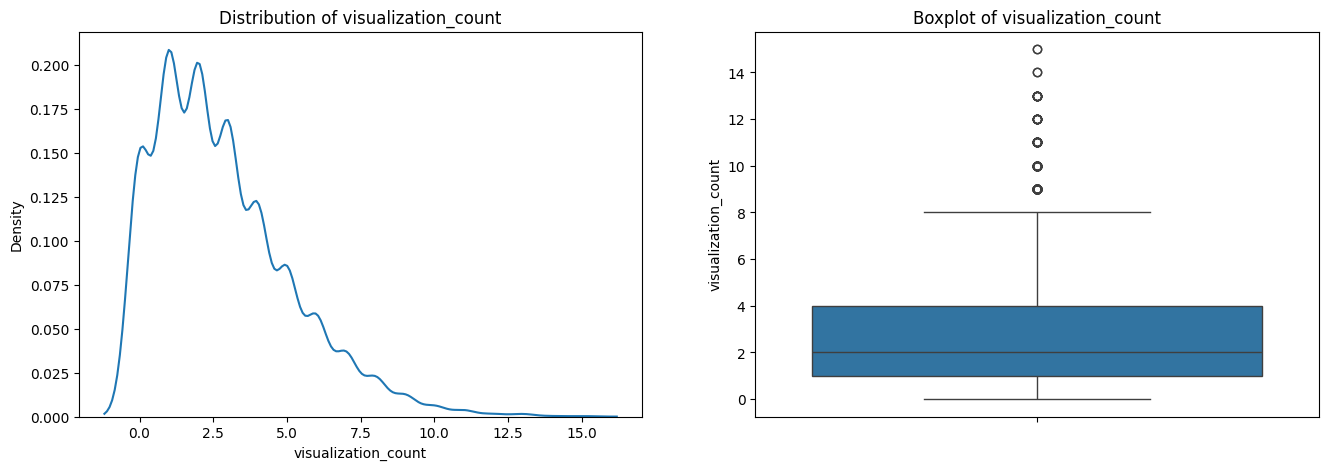

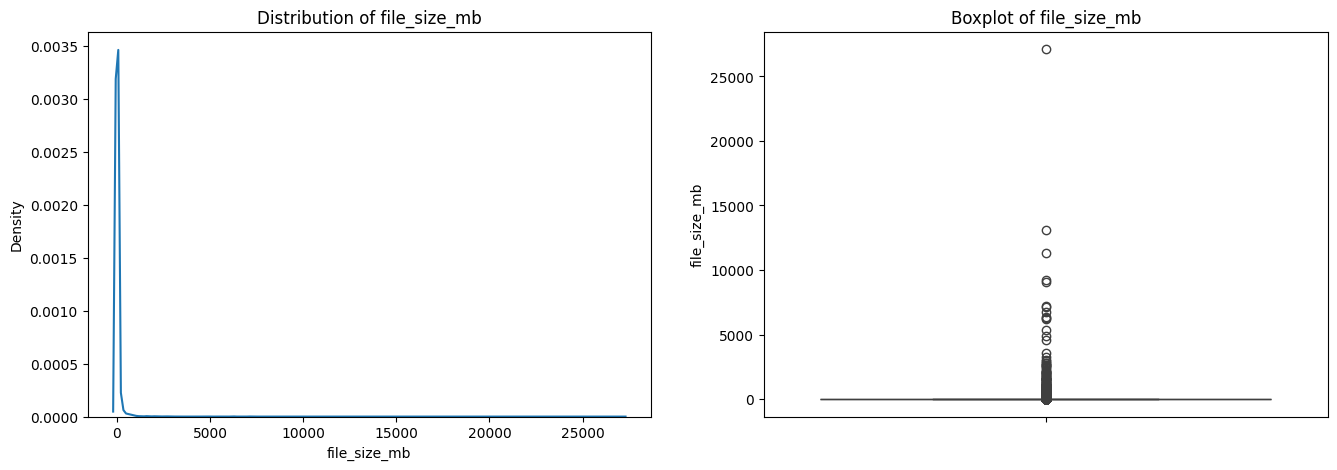

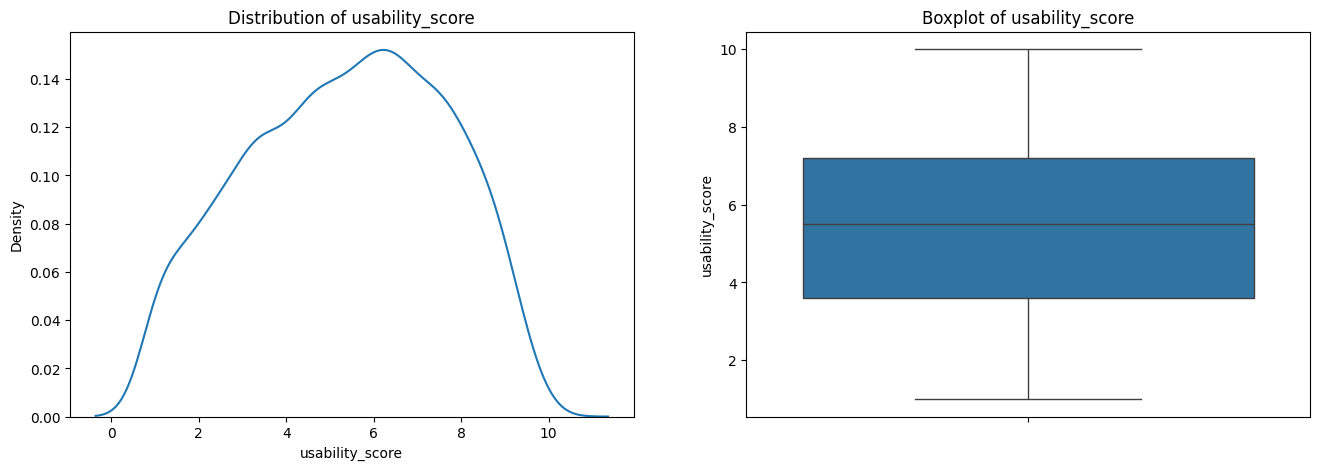

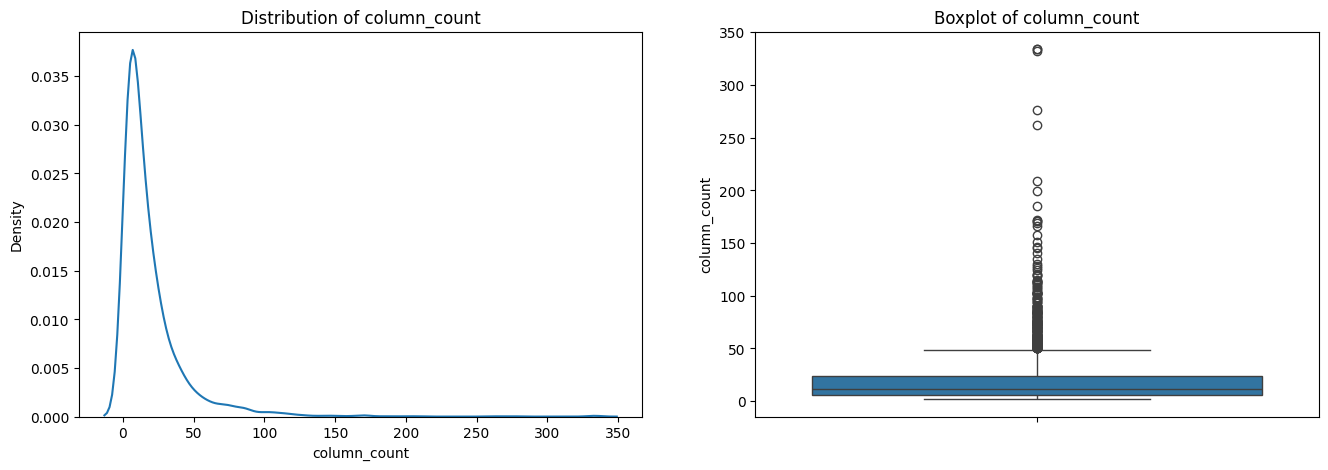

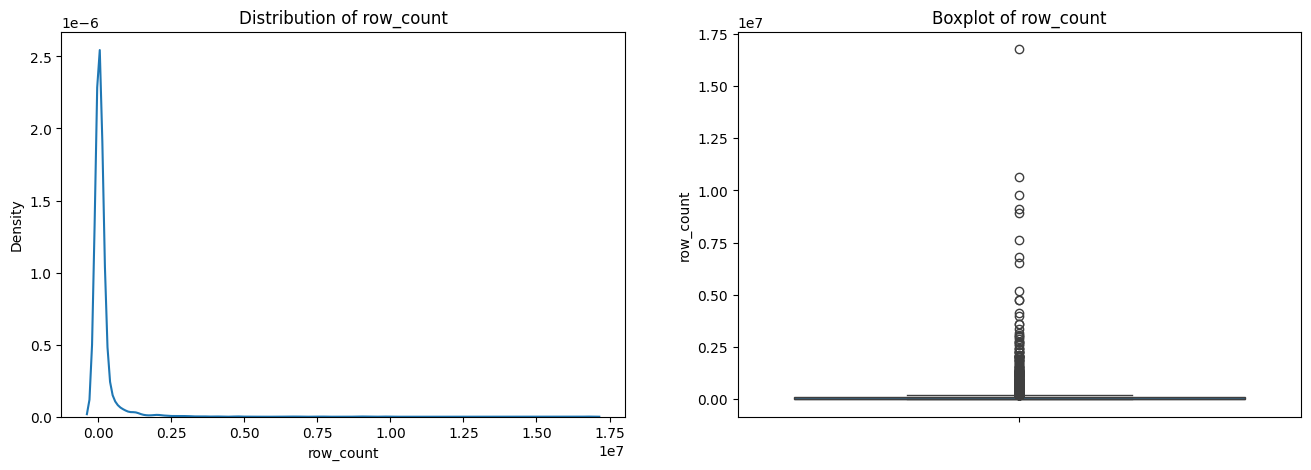

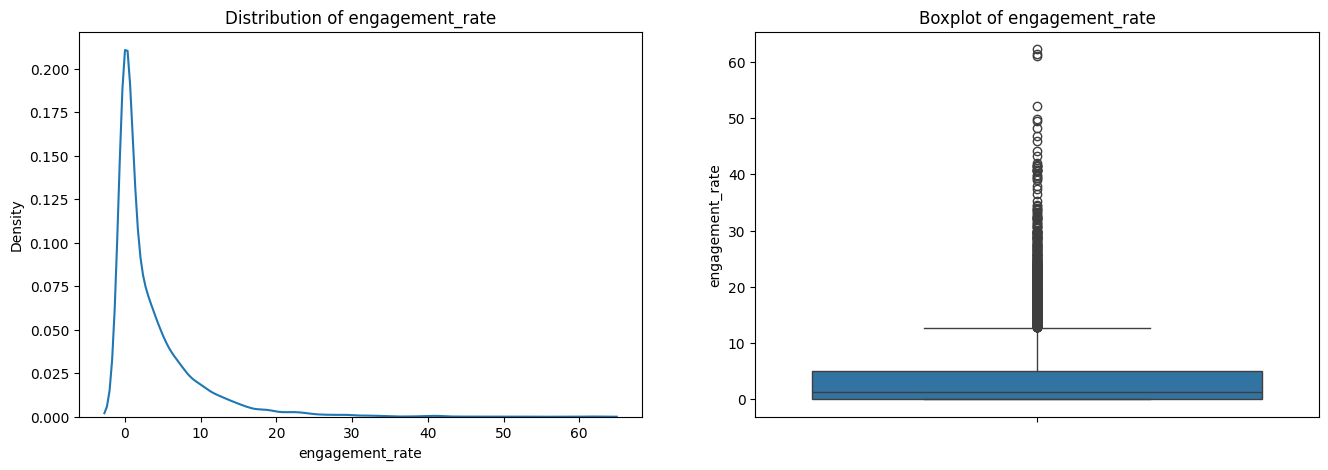

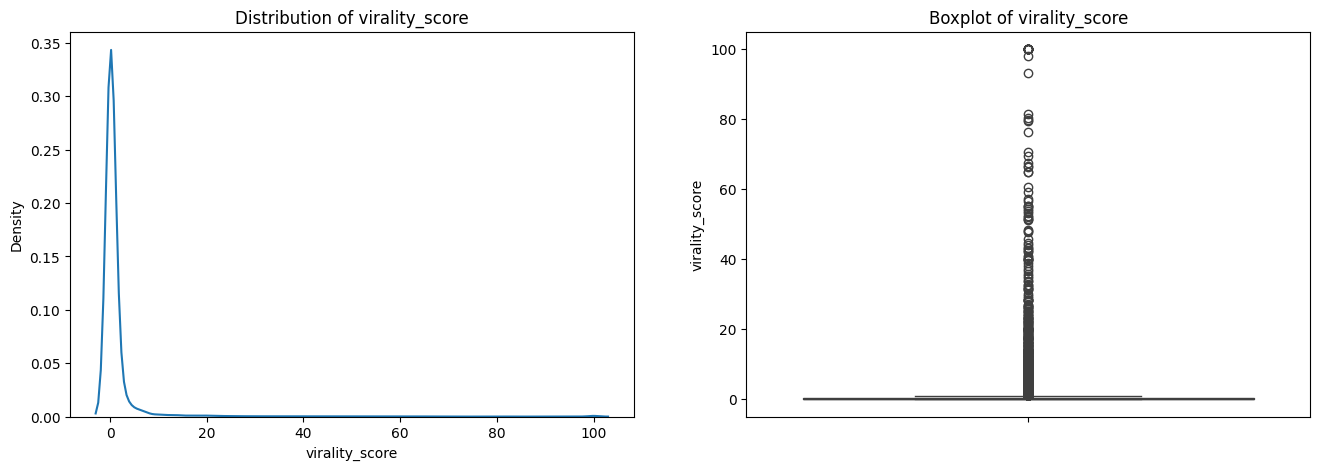

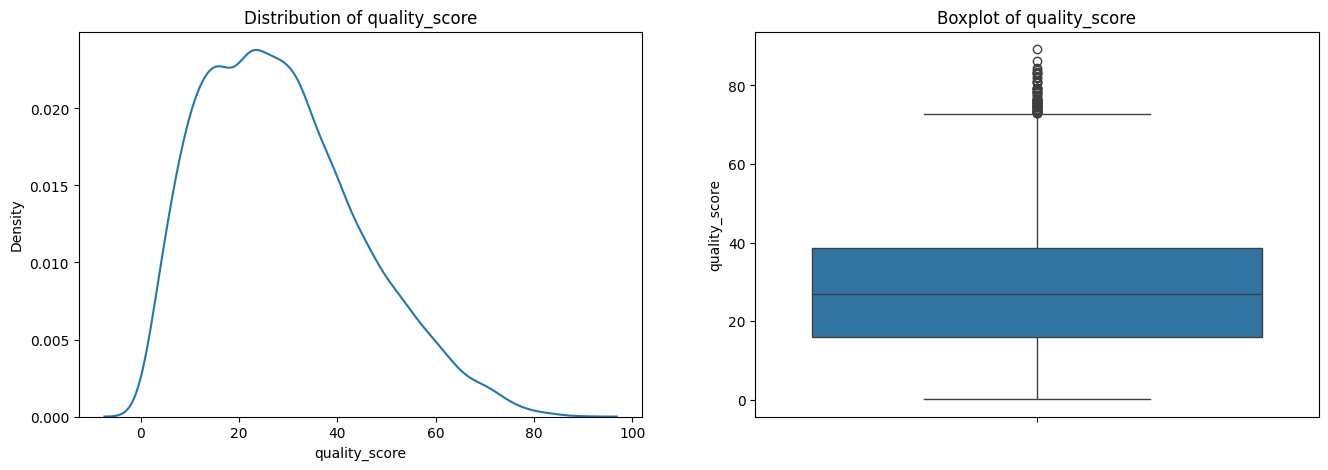

In [15]:
for col in sample_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.kdeplot(sample_df[col]) # Using histplot with kde for distribution
    plt.title(f'Distribution of {col}')
    plt.subplot(1,2,2)
    sns.boxplot(y=sample_df[col]) # Using y for vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
df.describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
author_followers,75417.0,388.044473,1.134693e+03,0.00,7.00,17.000,142.000,1394.000,3891.120,1.051910e+05
author_notebooks_count,75417.0,12.368577,2.183887e+01,1.00,1.00,1.000,7.000,41.000,100.000,8.110000e+02
author_datasets_count,75417.0,4.665301,8.801884e+00,0.00,0.00,0.000,2.000,16.000,41.000,3.200000e+02
days_since_creation,75417.0,1279.326306,7.379339e+02,0.00,26.00,129.000,1281.000,2426.000,2530.000,2.556000e+03
update_count,75417.0,40.247716,7.061752e+01,0.00,0.00,0.000,10.000,205.000,331.000,3.650000e+02
views,75417.0,3687.165825,1.783779e+04,10.00,10.00,19.000,574.000,14115.400,51238.320,1.919355e+06
upvotes,75417.0,25.139345,1.633331e+02,0.00,0.00,0.000,1.000,89.000,418.000,9.552000e+03
comments_count,75417.0,2.687418,2.166936e+01,0.00,0.00,0.000,0.000,9.000,47.000,1.388000e+03
fork_count,75417.0,17.224923,1.558062e+02,0.00,0.00,0.000,0.000,54.000,301.000,1.910900e+04
downloads,75417.0,98.276436,1.589561e+03,0.00,0.00,0.000,0.000,233.000,1666.840,2.747120e+05


In [17]:
df.select_dtypes(np.number).skew().sort_values()

,0
usability_score,-0.127490
markdown_ratio,-0.021824
days_since_creation,-0.005030
quality_score,0.600807
visualization_count,1.033224
update_count,2.523801
engagement_rate,2.785849
code_lines,3.876461
column_count,4.834605
author_datasets_count,8.114857


In [18]:
outlier_count = {}
for col in sample_df.select_dtypes(include=np.number).columns:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  count = 0
  for i in df[col]:
    if i > upper_limit or i < lower_limit:
      count= count+1
  if(count!=0):
    outlier_count[col] = count
outlier_df = pd.DataFrame(outlier_count.items(), columns=['Column Name', 'Outlier Count'])
display(outlier_df)



,Column Name,Outlier Count
0,author_followers,7815
1,author_notebooks_count,6530
2,author_datasets_count,6154
3,update_count,9958
4,views,9919
5,upvotes,11505
6,comments_count,17266
7,fork_count,13427
8,downloads,17642
9,notebook_usage,7197


In [19]:
for col in df.select_dtypes(include="object").columns:
  print(col , df[col].nunique())

content_type 2
title 1001
author_username 12665
author_tier 5
primary_topic 50
all_topics 47165
programming_language 4
is_competition_related 2
created_date 2557
last_updated 2555
medal 3
is_featured 2
is_trending 2
libraries_used 51972
uses_gpu 2
file_format 7
license_type 9


In [20]:
cat_cols = [
    col for col in df.select_dtypes(include="object").columns
    if df[col].nunique() <= 20
]
cat_cols

['content_type',
 'author_tier',
 'programming_language',
 'is_competition_related',
 'medal',
 'is_featured',
 'is_trending',
 'uses_gpu',
 'file_format',
 'license_type']

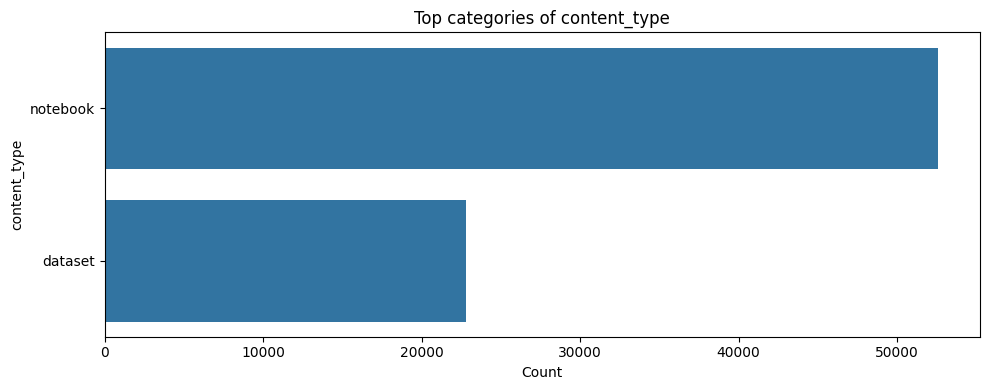

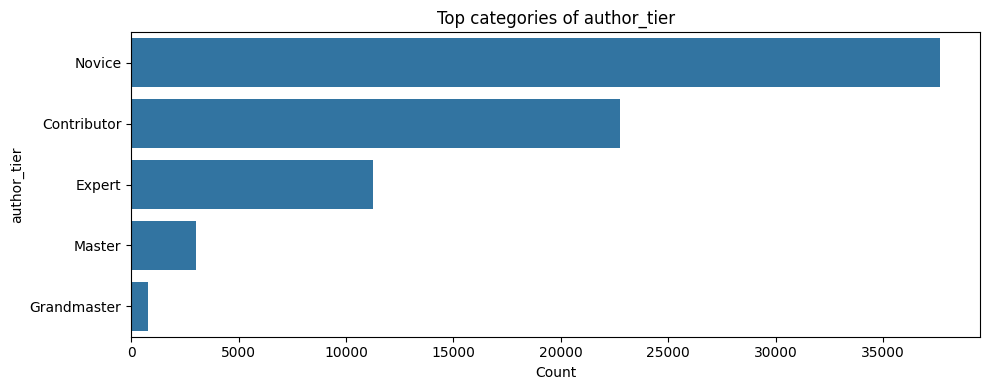

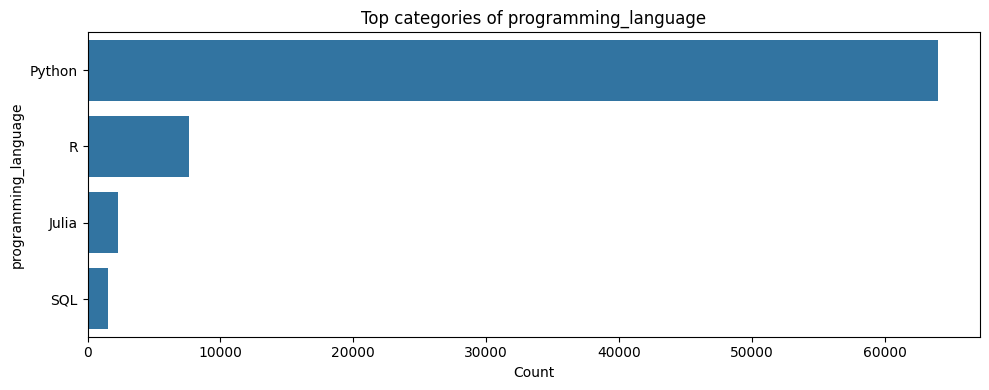

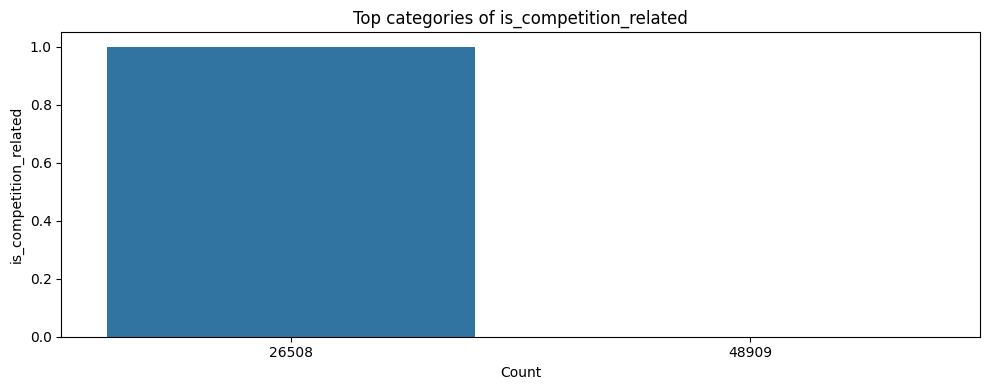

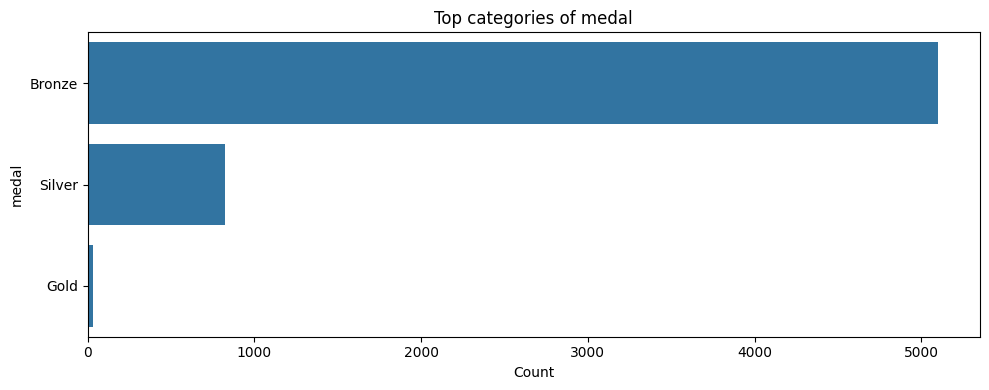

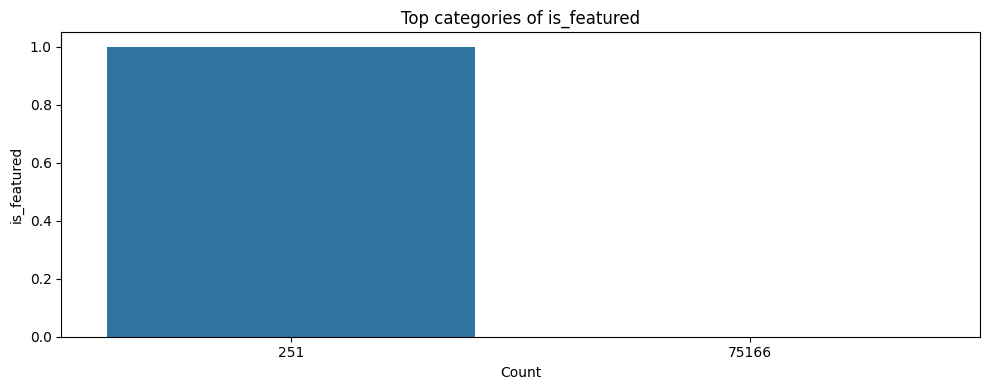

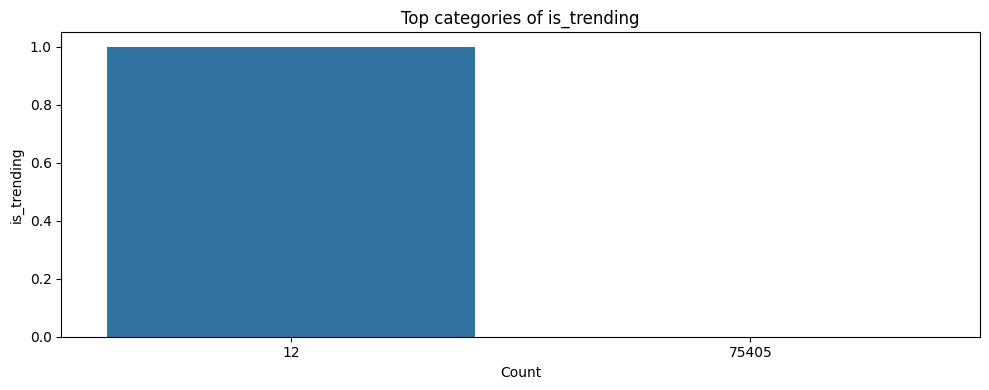

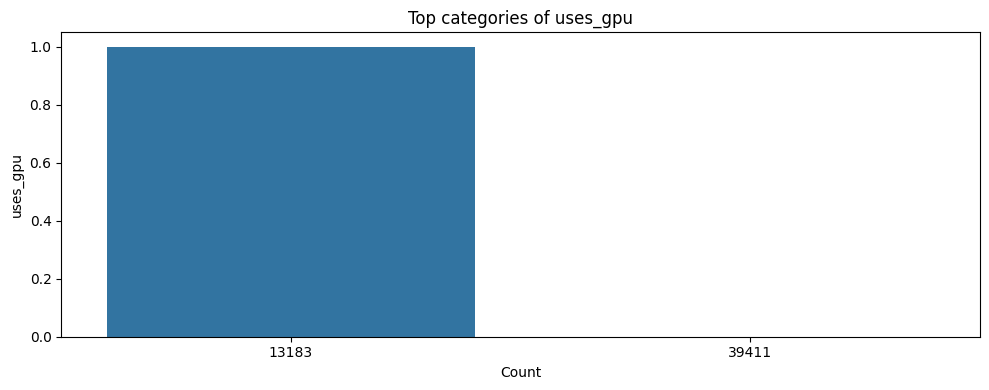

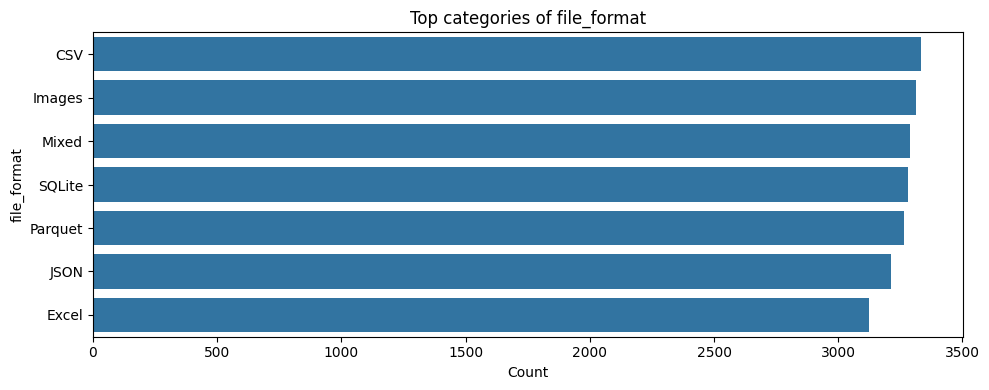

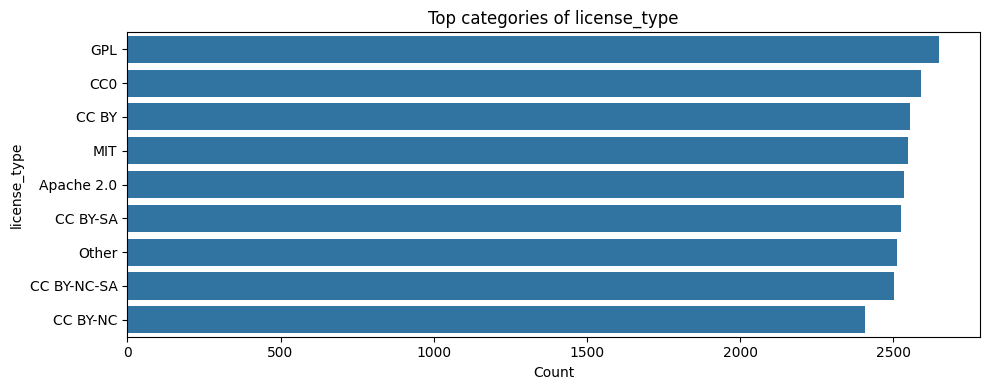

In [21]:
for col in cat_cols:
    counts = df[col].value_counts()

    plt.figure(figsize=(10, 4))
    sns.barplot(
        x=counts.values,
        y=counts.index
    )
    plt.title(f"Top categories of {col}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

In [22]:
more_cat_cols = [
    col for col in df.select_dtypes(include="object").columns
    if df[col].nunique() > 20
]
more_cat_cols

['title',
 'author_username',
 'primary_topic',
 'all_topics',
 'created_date',
 'last_updated',
 'libraries_used']

In [38]:
df['author_username'].value_counts()

,count
author_username,
learn_hunter,184
ml_expert,181
analytics_expert,179
analytics_pro,177
model_analyst,175
...,...
neuralninja526,1
chrishunter578,1
morgangeek66,1


In [32]:
df['title'].value_counts()

,count
title,
Beginner's Guide to Titanic,157
Computer Vision - From Zero to Hero,151
Data Visualization: A Comprehensive Guide,147
Understanding Customer Churn with Python,147
🔥 Finance - Gold Medal Solution,143
...,...
Real-world LightGBM Data,57
Global Image Classification Statistics,56
Real-world Sentiment Analysis Data,55


In [39]:
df['primary_topic'].value_counts()

,count
primary_topic,
PyTorch,2069
Recommendation Systems,2053
Regression,2052
BERT,2052
GPT,2048
Stock Market,2048
Forecasting,2046
Climate,2044
Housing,2043


In [40]:
df['all_topics'].value_counts()

,count
all_topics,
Finance,441
Customer Churn,432
Random Forest,424
E-commerce,423
COVID-19,416
...,...
Time Series|Classification|RNN|Pandas|Attention Mechanism,1
Classification|Climate|BERT,1
Recommendation Systems|Forecasting|COVID-19|Natural Language Processing,1


In [41]:
df['libraries_used'].value_counts()

,count
libraries_used,
eli5|pytorch|sklearn,5
statsmodels|prophet|eli5,5
keras|seaborn|numpy,4
numpy|xgboost|tensorflow,4
transformers|xgboost|prophet,4
...,...
nltk|optuna|pytorch|matplotlib,1
plotly|statsmodels|pandas|lightgbm|matplotlib,1
opencv|lightgbm|pandas|xgboost|nltk|prophet|spacy|tensorflow|transformers|pytorch|eli5|lime|scipy|sklearn|shap,1


/tmp/ipython-input-2859370517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trending_by_tier, x='author_tier', y='is_trending', palette='viridis')


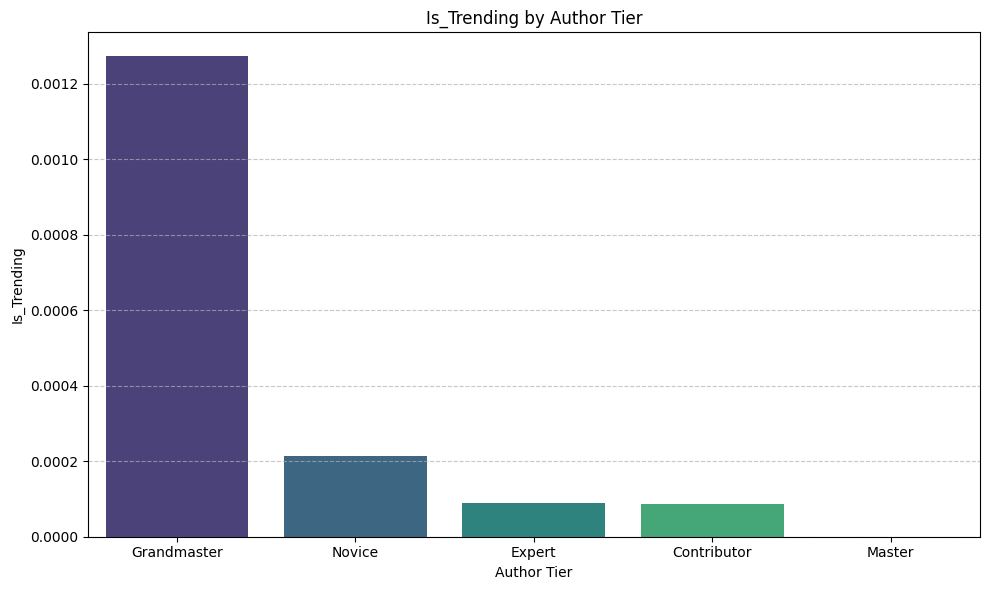

In [23]:
trending_by_tier = df.groupby('author_tier')['is_trending'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=trending_by_tier, x='author_tier', y='is_trending', palette='viridis')
plt.title('Is_Trending by Author Tier')
plt.xlabel('Author Tier')
plt.ylabel('Is_Trending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-925548780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_rate_by_tier, x='author_tier', y='engagement_rate', palette='viridis')


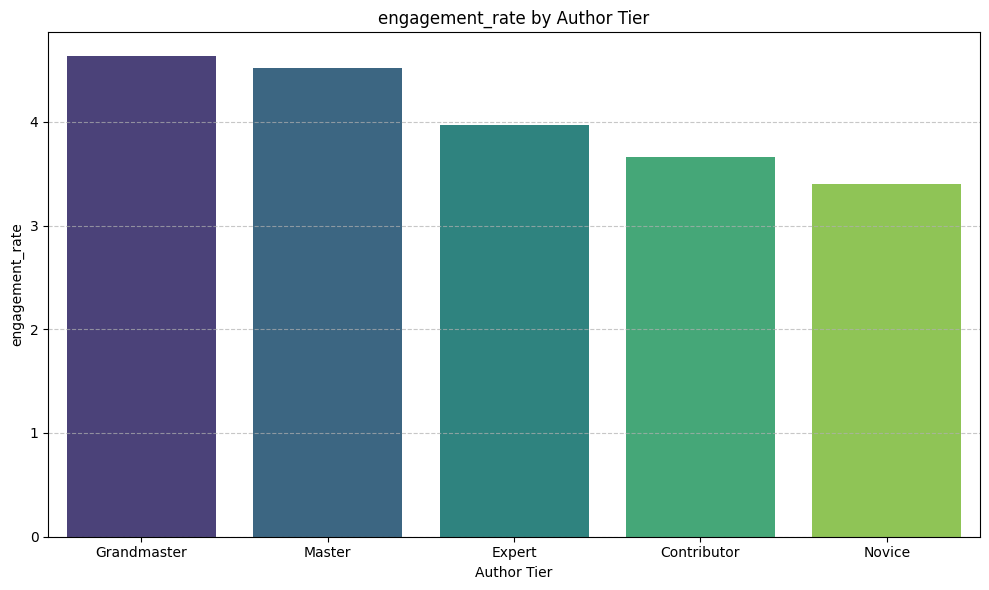

In [24]:
engagement_rate_by_tier = df.groupby('author_tier')['engagement_rate'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_rate_by_tier, x='author_tier', y='engagement_rate', palette='viridis')
plt.title('engagement_rate by Author Tier')
plt.xlabel('Author Tier')
plt.ylabel('engagement_rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

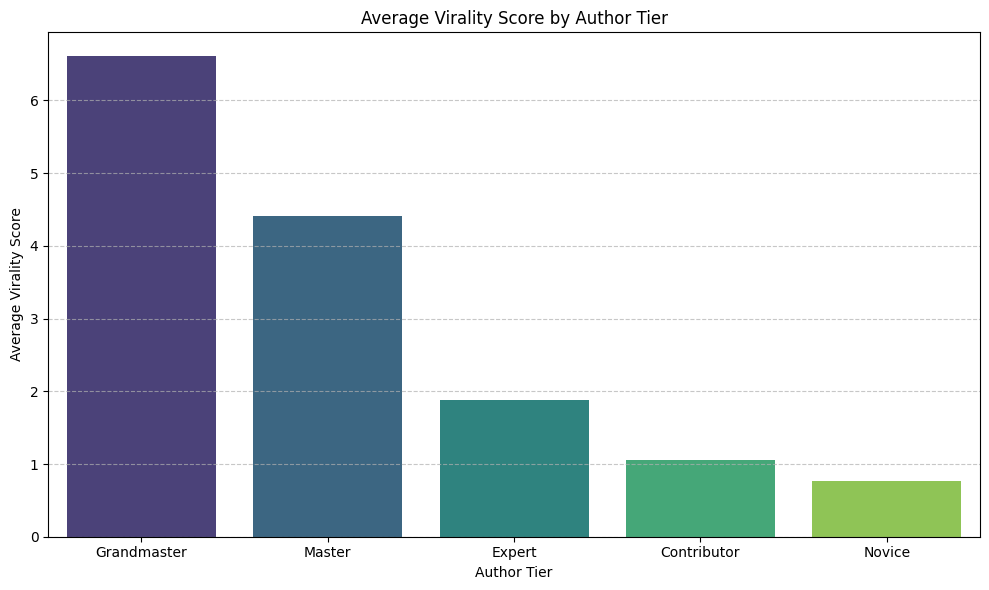

In [167]:
avg_virality_by_tier = df.groupby('author_tier')['virality_score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_virality_by_tier, x='author_tier', y='virality_score', hue='author_tier', palette='viridis', legend=False)
plt.title('Average Virality Score by Author Tier')
plt.xlabel('Author Tier')
plt.ylabel('Average Virality Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
df['is_competition_related'].sample(10)

,is_competition_related
13829,False
52026,False
25692,True
56019,False
7846,False
12012,False
30263,True
61281,True
43296,False
48455,True


In [28]:
df['engagement_rate'].sample(10)

,engagement_rate
49042,1.68
2165,1.09
11827,0.00
40552,0.00
16852,0.00
27415,0.00
24921,7.84
63544,2.23
6509,9.07
7175,5.31


The Competition Boost - Competition-related content sees 2.5x higher engagement ?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

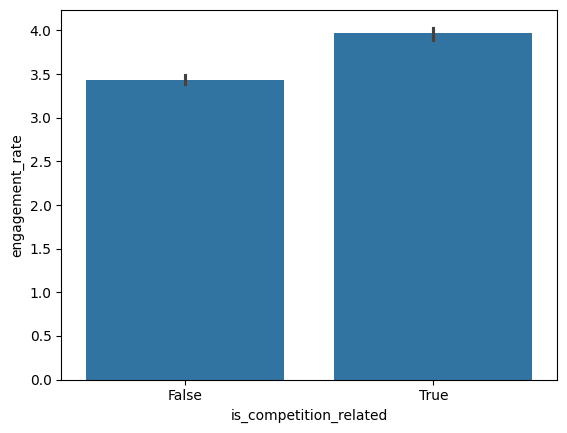

In [29]:
sns.barplot(data=df, x='is_competition_related', y='engagement_rate')
plt

<Axes: xlabel='engagement_rate', ylabel='Density'>

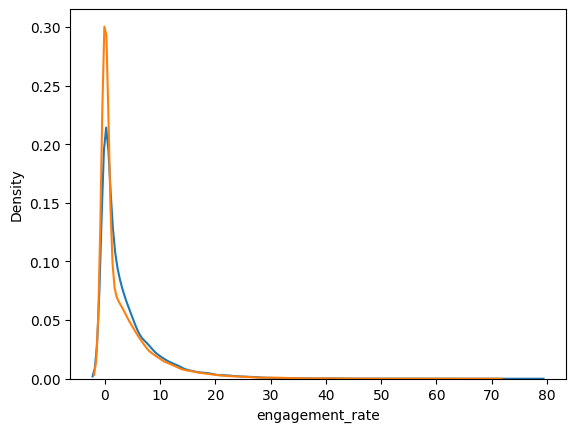

In [39]:
sns.kdeplot(df[df['is_competition_related']==True]['engagement_rate'] )
sns.kdeplot(df[df['is_competition_related']==False]['engagement_rate'] )

In [36]:
avg_engagement_rate_competition = df[df['is_competition_related'] == True]['engagement_rate'].mean()
avg_engagement_rate_non_competition = df[df['is_competition_related'] == False]['engagement_rate'].mean()

if avg_engagement_rate_non_competition != 0:
    increase_factor = avg_engagement_rate_competition / avg_engagement_rate_non_competition
    print(f"The engagement rate for competition-related content is {increase_factor:.2f} times higher than for non-competition-related content.")
else:
    print("Cannot calculate the increase factor as the average engagement rate for non-competition-related content is zero.")

The engagement rate for competition-related content is 1.15 times higher than for non-competition-related content.


Timing Matters - Does posting frequency or update cadence affect success?

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75418 entries, 0 to 75417
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   content_type            75418 non-null  object 
 1   title                   75418 non-null  object 
 2   author_username         75417 non-null  object 
 3   author_tier             75417 non-null  object 
 4   author_followers        75417 non-null  float64
 5   author_notebooks_count  75417 non-null  float64
 6   author_datasets_count   75417 non-null  float64
 7   primary_topic           75417 non-null  object 
 8   all_topics              75417 non-null  object 
 9   programming_language    75417 non-null  object 
 10  is_competition_related  75417 non-null  object 
 11  created_date            75417 non-null  object 
 12  last_updated            75417 non-null  object 
 13  days_since_creation     75417 non-null  float64
 14  update_count            75417 non-null

In [42]:
df['author_username'].nunique()

12665

In [45]:
df['author_username'].value_counts()

,count
author_username,
analytics_wizard,145
learn_hunter,139
science_wizard,136
model_analyst,136
ml_expert,135
...,...
modelscientist240,1
codemaster916,1
alexanalyst116,1


In [57]:
df[df['author_username'] == 'science_wizard']

,content_type,title,author_username,author_tier,author_followers,author_notebooks_count,author_datasets_count,primary_topic,all_topics,programming_language,...,file_size_mb,usability_score,file_format,column_count,row_count,license_type,engagement_rate,virality_score,quality_score,author_post_count
1622,dataset,Complete Climate Data,science_wizard,Novice,85,5,2,Climate,Climate,Python,...,18.57,4.4,Images,11.0,94943.0,CC BY-NC,2.77,0.1,17.9,7
2433,notebook,Natural Language Processing Prediction using ML,science_wizard,Contributor,472,4,3,Natural Language Processing,Natural Language Processing|LightGBM|Forecasting,Python,...,1.27,NaN,NaN,NaN,NaN,NaN,4.65,1.1,43.1,7
3807,notebook,Complete Text Classification Analysis with EDA,science_wizard,Contributor,1686,4,2,Text Classification,Text Classification|Deep Learning|Recommendati...,Python,...,1.07,NaN,NaN,NaN,NaN,NaN,0.00,0.0,11.4,6
3818,dataset,Social Media Time Series,science_wizard,Novice,46,4,1,Social Media,Social Media|Neural Networks|Customer Churn|Ho...,Python,...,126.81,1.7,Images,7.0,57749.0,MIT,0.00,0.0,4.8,5
5518,notebook,Understanding LightGBM with Python,science_wizard,Contributor,85,19,2,LightGBM,LightGBM|Housing,Python,...,1.48,NaN,NaN,NaN,NaN,NaN,1.62,0.0,29.6,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97984,notebook,🔥 Recommendation Systems - Gold Medal Solution,science_wizard,Contributor,108,3,12,Recommendation Systems,Recommendation Systems|Clustering|MNIST,Python,...,4.32,NaN,NaN,NaN,NaN,NaN,1.98,0.0,21.3,15
98591,notebook,Sentiment Analysis: A Comprehensive Guide,science_wizard,Novice,391,9,7,Sentiment Analysis,Sentiment Analysis|Transportation,Python,...,0.66,NaN,NaN,NaN,NaN,NaN,7.69,0.1,42.9,16
98609,dataset,Image Classification - Cleaned & Ready,science_wizard,Expert,1242,5,18,Image Classification,Image Classification|Sports Analytics,Python,...,20.13,4.1,Parquet,20.0,15246.0,CC BY,0.00,0.0,14.5,23
98658,dataset,Complete Finance Data,science_wizard,Expert,188,18,9,Finance,Finance|Pandas|Named Entity Recognition|LightGBM,Python,...,0.56,6.2,JSON,18.0,1444.0,CC BY-NC,4.06,1.0,27.4,27


In [6]:
df['author_post_count'] = df['author_notebooks_count']+df['author_datasets_count']

In [7]:
df.shape

(100000, 40)

In [56]:
df['author_post_count'].sample(10)

,author_post_count
47998,5
72526,9
83125,15
69442,118
68359,2
86391,4
19205,3
17881,21
67064,12
54595,2


<Axes: xlabel='author_post_count', ylabel='engagement_rate'>

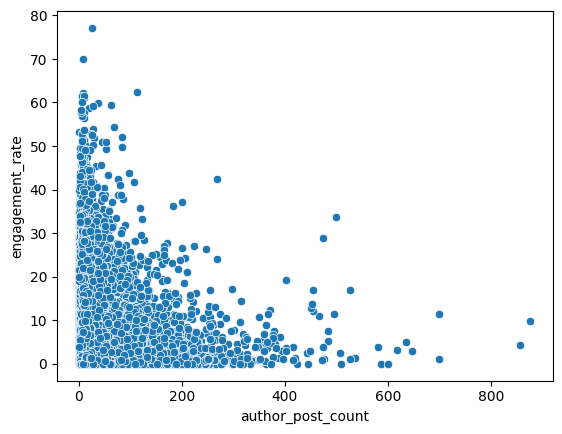

In [67]:
sns.scatterplot(data=df, x='author_post_count', y='engagement_rate')

<Axes: xlabel='author_post_count', ylabel='views'>

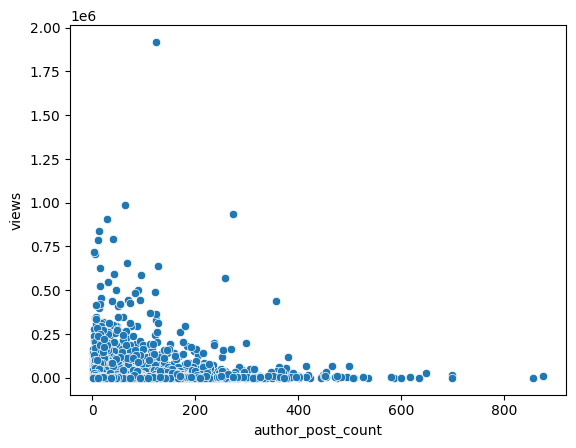

In [65]:
sns.scatterplot(data=df, x='author_post_count', y='views')

<Axes: xlabel='author_post_count', ylabel='virality_score'>

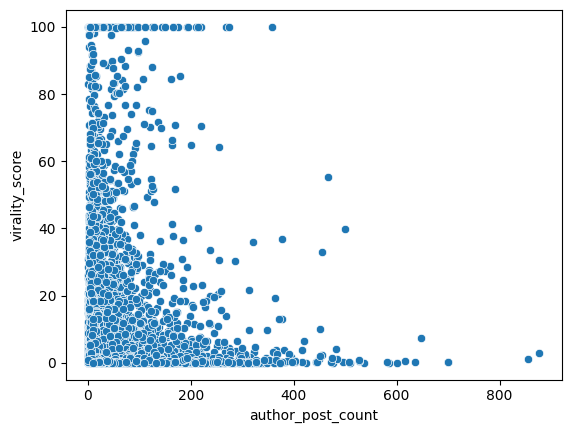

In [68]:
sns.scatterplot(data=df, x='author_post_count', y='virality_score')

<Axes: xlabel='author_post_count', ylabel='Density'>

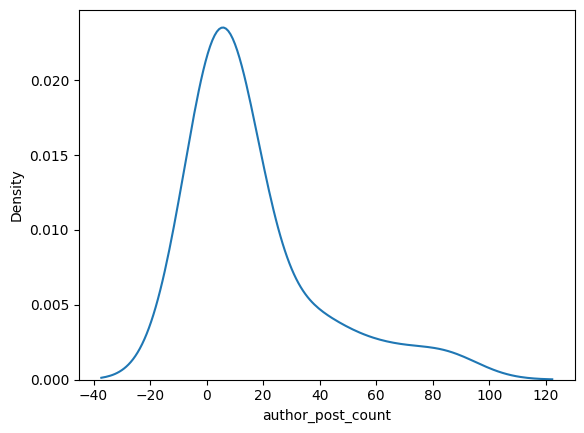

In [72]:
sns.kdeplot(df[df['is_trending']==1]['author_post_count'] )

<Axes: xlabel='author_post_count', ylabel='Density'>

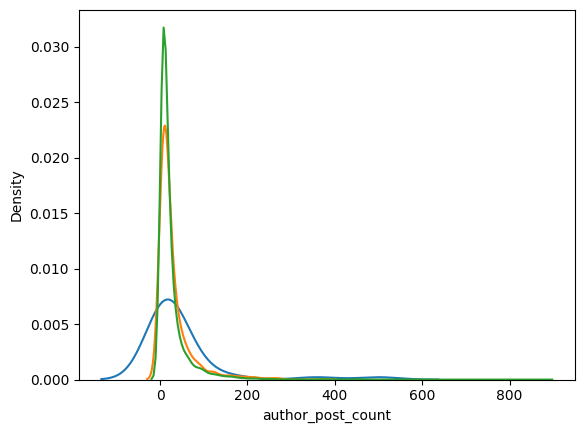

In [74]:
sns.kdeplot(df[df['medal']=='Gold']['author_post_count'] )
sns.kdeplot(df[df['medal']=='Silver']['author_post_count'] )
sns.kdeplot(df[df['medal']=='Bronze']['author_post_count'] )

In [75]:
df['update_count'].sample(10)

,update_count
76347,291
91504,0
319,1
20194,26
91863,62
56332,0
73977,15
77036,149
86565,43
33687,9


<Axes: xlabel='update_count', ylabel='engagement_rate'>

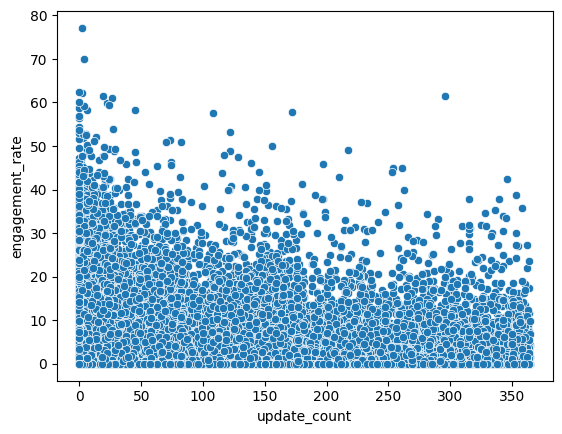

In [76]:
sns.scatterplot(data=df, x='update_count', y='engagement_rate')

<Axes: xlabel='update_count', ylabel='views'>

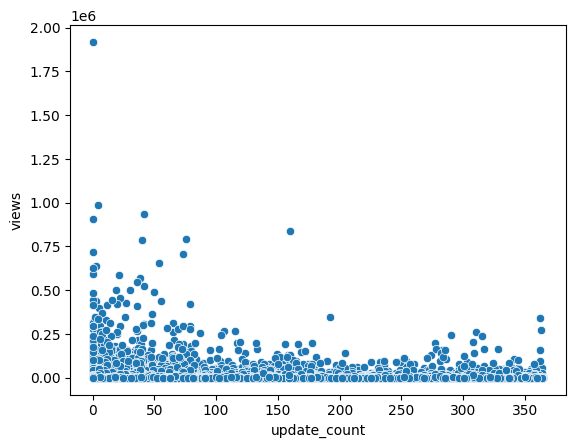

In [77]:
sns.scatterplot(data=df, x='update_count', y='views')

<Axes: xlabel='update_count', ylabel='virality_score'>

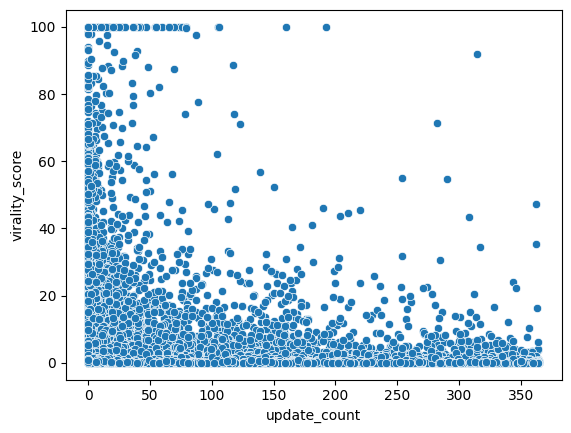

In [78]:
sns.scatterplot(data=df, x='update_count', y='virality_score')

<Axes: xlabel='update_count', ylabel='Density'>

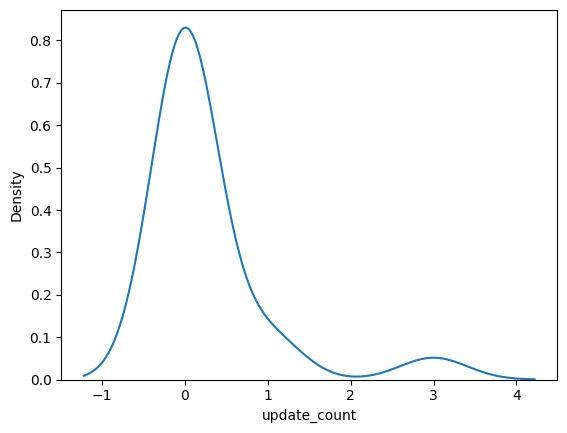

In [79]:
sns.kdeplot(df[df['is_trending']==1]['update_count'] )

<Axes: xlabel='update_count', ylabel='Density'>

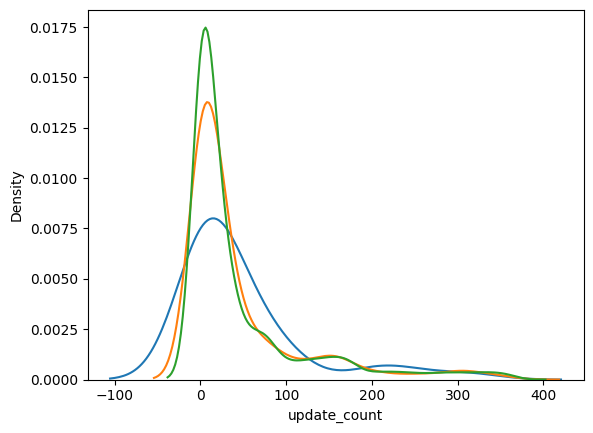

In [80]:
sns.kdeplot(df[df['medal']=='Gold']['update_count'] )
sns.kdeplot(df[df['medal']=='Silver']['update_count'] )
sns.kdeplot(df[df['medal']=='Bronze']['update_count'] )

No ,  posting frequency or update cadence doesn't have a great affect on the success


Do notebooks with more charts get more upvotes?

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   content_type            100000 non-null  object 
 1   title                   100000 non-null  object 
 2   author_username         100000 non-null  object 
 3   author_tier             100000 non-null  object 
 4   author_followers        100000 non-null  int64  
 5   author_notebooks_count  100000 non-null  int64  
 6   author_datasets_count   100000 non-null  int64  
 7   primary_topic           100000 non-null  object 
 8   all_topics              100000 non-null  object 
 9   programming_language    100000 non-null  object 
 10  is_competition_related  100000 non-null  bool   
 11  created_date            100000 non-null  object 
 12  last_updated            100000 non-null  object 
 13  days_since_creation     100000 non-null  int64  
 14  update_count         

In [87]:
df['visualization_count'].sample(10)

,visualization_count
79848,NaN
57352,NaN
99843,1.0
20474,8.0
21420,4.0
20468,6.0
98109,1.0
46648,10.0
25429,NaN
62453,2.0


<Axes: xlabel='visualization_count', ylabel='upvotes'>

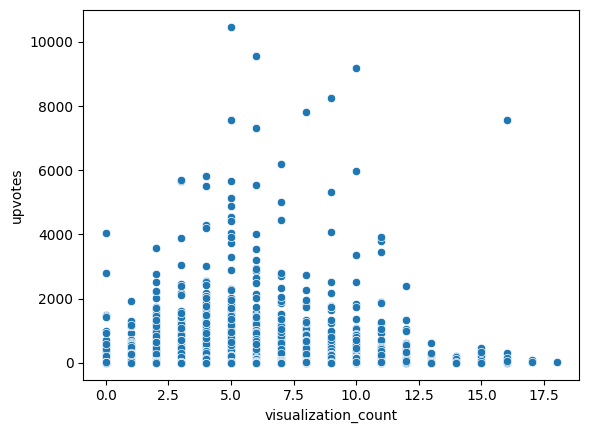

In [90]:
sns.scatterplot(data=df, x='visualization_count', y='upvotes')

Notebooks containing 5-10 visualization charts are most upvoted , increasing charts more than that decreases the upvotes


**Feature Engineering**

We will start handling the null values , from the dataset it is inferred for multiple columns that data not present doesn't clearly means that it has data missing due to some issues or data might be corrupt , data missing for columns have a clear inference here , For ex - in the medals col , lot of data is missing , it clearly means that those candidates didn't got any medals , so here we need to store this missing valuyes in such a way that it can be used in the model prediction rather than just imputing with some random values


In [49]:
df.isnull().mean()

,0
content_type,0.00000
title,0.00000
author_username,0.00000
author_tier,0.00000
author_followers,0.00000
author_notebooks_count,0.00000
author_datasets_count,0.00000
primary_topic,0.00000
all_topics,0.00000
programming_language,0.00000


In [8]:
cols_with_missing = ["medal", "execution_time_seconds", "code_lines", "markdown_ratio" , "visualization_count" , "libraries_used" ,"uses_gpu",
                     "usability_score", "file_format", "column_count", "row_count" , "license_type"]

for col in cols_with_missing:
    df[f"{col}_missing"] = df[col].isna().astype(int)

In [9]:
df.shape

(100000, 52)

Now working on time date columns and generating further features

In [36]:
df['created_date'].head()

,created_date
0,2024-08-31
1,2025-12-08
2,2019-10-20
3,2024-02-23
4,2019-09-18


In [37]:
df['last_updated'].head()

,last_updated
0,2024-08-31
1,2025-12-08
2,2025-12-21
3,2025-12-26
4,2025-08-17


In [10]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [11]:
df['created_date_year'] = df['created_date'].dt.year
df['last_updated_year'] = df['last_updated'].dt.year
df.shape

(100000, 54)

In [12]:
df['created_date_month'] = df['created_date'].dt.month
df['last_updated_month'] = df['last_updated'].dt.month
df.shape

(100000, 56)

In [13]:
df['created_date_day'] = df['created_date'].dt.day
df['last_updated_day'] = df['last_updated'].dt.day
df.shape

(100000, 58)

In [14]:
df['created_date_dow'] = df['created_date'].dt.day_of_week
df['last_updated_dow'] = df['created_date'].dt.day_of_week
df.shape

(100000, 60)

In [15]:
df['created_date_is_weekend'] = df['created_date_dow'].apply(lambda x: 1 if x in [5, 6] else 0)
df['created_date_is_weekday'] = df['created_date_dow'].apply(lambda x: 1 if x  not in [5, 6] else 0)
df.shape

(100000, 62)

In [16]:
df= df.drop(['created_date' , 'last_updated'] , axis =1 )
df.shape

(100000, 60)

In [53]:
df['author_followers'].describe()

,author_followers
count,100000.00000
mean,385.12369
std,1101.29717
min,0.00000
25%,59.00000
50%,142.00000
75%,354.00000
max,105191.00000


In [17]:
conditions = [
    df['author_followers'] > 1000,
    df['author_followers'] > 500,
    df['author_followers'] > 100,
    df['author_followers'] > 50
]
choices = [4, 3, 2, 1]
df['author_followers_range'] = np.select(conditions, choices, default=0)
df.shape

(100000, 61)

In [59]:
df['views'].value_counts()

,count
views,
10,2896
13,280
14,278
12,270
25,258
...,...
9939,1
13086,1
20666,1


In [18]:
conditions = [
    df['views'] > 1000,
    df['views'] > 500,
    df['views'] > 100,
    df['views'] > 50
]
choices = [4, 3, 2, 1]
df['views_range'] = np.select(conditions, choices, default=0)
df.shape

(100000, 62)

In [66]:
df['views_range'].value_counts()

,count
views_range,
4,38881
2,27987
3,13808
0,11725
1,7599


In [62]:
df['upvotes'].describe()

,upvotes
count,100000.000000
mean,25.263640
std,171.033047
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,12068.000000


In [19]:
conditions = [
    df['upvotes'] > 100,
    df['upvotes'] > 50,
    df['upvotes'] > 10,
    df['upvotes'] > 5
]
choices = [4, 3, 2, 1]
df['upvotes_range'] = np.select(conditions, choices, default=0)
df.shape

(100000, 63)

In [76]:
df['upvotes_range'].value_counts()

,count
upvotes_range,
0,69559
2,14311
1,7991
4,4533
3,3606


In [77]:
df['downloads'].value_counts()

,count
downloads,
0,73419
1,1825
2,1312
3,978
4,854
...,...
1689,1
624,1
9971,1


In [20]:
conditions = [
    df['downloads'] > 100,
    df['downloads'] > 50,
    df['downloads'] > 10,
    df['downloads'] > 5
]
choices = [4, 3, 2, 1]
df['downloads_range'] = np.select(conditions, choices, default=0)
df.shape

(100000, 64)

In [79]:
df['downloads_range'].value_counts()

,count
downloads_range,
0,79121
4,8231
2,7102
3,2946
1,2600


In [87]:
df['created_date_date']

,created_date_date
0,2024-08-31
1,2025-12-08
2,2019-10-20
3,2024-02-23
4,2019-09-18
...,...
99995,2021-02-27
99996,2025-05-21
99997,2022-01-30
99998,2022-11-11


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   content_type                    100000 non-null  object 
 1   title                           100000 non-null  object 
 2   author_username                 100000 non-null  object 
 3   author_tier                     100000 non-null  object 
 4   author_followers                100000 non-null  int64  
 5   author_notebooks_count          100000 non-null  int64  
 6   author_datasets_count           100000 non-null  int64  
 7   primary_topic                   100000 non-null  object 
 8   all_topics                      100000 non-null  object 
 9   programming_language            100000 non-null  object 
 10  is_competition_related          100000 non-null  int64  
 11  days_since_creation             100000 non-null  int64  
 12  update_count     

In [21]:
X = df.drop(columns='medal')
y = df['medal']

In [22]:
X.shape , y.shape

((100000, 63), (100000,))

In [41]:
X.sample(10)

,content_type,title,author_username,author_tier,author_followers,author_notebooks_count,author_datasets_count,primary_topic,all_topics,programming_language,...,created_date_day,last_updated_day,created_date_dow,last_updated_dow,created_date_is_weekend,created_date_is_weekday,author_followers_range,views_range,upvotes_range,downloads_range
8853,notebook,Customer Churn Prediction using ML,stat_analyst,Contributor,60,14,4,Customer Churn,Customer Churn,Python,...,10,26,4,4,0,1,1,2,0,0
90239,notebook,Complete Fraud Detection Analysis with EDA,chrisguru,Contributor,149,15,2,Fraud Detection,Fraud Detection|Sports Analytics|LSTM|Pandas|C...,Python,...,27,31,2,2,0,1,2,0,0,0
20251,notebook,EDA + Feature Engineering: Image Classification,caseyanalyst,Contributor,98,12,4,Image Classification,Image Classification|TensorFlow|Neural Network...,Python,...,30,29,6,6,1,0,1,1,0,0
9036,notebook,Complete Pandas Analysis with EDA,neuralninja,Contributor,20,5,2,Pandas,Pandas,Python,...,27,28,5,5,1,0,0,3,0,0
22961,notebook,Recommendation Systems: End-to-End Pipeline,codewizard,Novice,30,3,0,Recommendation Systems,Recommendation Systems|COVID-19,Python,...,8,28,2,2,0,1,0,0,0,0
9638,notebook,Beginner's Guide to Text Classification,insight_pro,Novice,74,14,0,Text Classification,Text Classification|Random Forest|Scikit-learn,Python,...,21,18,3,3,0,1,1,2,0,0
26857,dataset,Complete Keras Data,johndev,Expert,120,41,3,Keras,Keras|Climate|RNN,Python,...,20,31,2,2,0,1,2,3,0,2
41518,notebook,🔥 Customer Churn - Gold Medal Solution,learnmaster,Novice,251,12,0,Customer Churn,Customer Churn|Deep Learning,Python,...,18,27,3,3,0,1,2,4,3,0
62554,notebook,Computer Vision: A Comprehensive Guide,caseymaster,Novice,137,5,7,Computer Vision,Computer Vision|Classification|Time Series|GPT...,Python,...,5,5,2,2,0,1,2,2,0,0
2229,notebook,Deep Dive into CNN,python_dev,Novice,15,5,0,CNN,CNN,Python,...,30,16,6,6,1,0,0,0,0,0


In [23]:
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(include="object").columns

In [68]:
cat_cols

Index(['content_type', 'title', 'author_username', 'author_tier',
       'primary_topic', 'all_topics', 'programming_language', 'libraries_used',
       'uses_gpu', 'file_format', 'license_type'],
      dtype='object')

In [125]:
df['author_tier'].value_counts()

,count
author_tier,
Novice,49974
Contributor,30059
Expert,14910
Master,4045
Grandmaster,1012


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder , FunctionTransformer
import numpy as np


In [25]:
binary_cols = [
    col for col in num_cols
    if df[col].nunique() == 2
]

continuous_cols = list(set(num_cols) - set(binary_cols))

In [87]:
binary_cols

['is_competition_related',
 'is_featured',
 'is_trending',
 'medal_missing',
 'execution_time_seconds_missing',
 'code_lines_missing',
 'markdown_ratio_missing',
 'visualization_count_missing',
 'libraries_used_missing',
 'uses_gpu_missing',
 'usability_score_missing',
 'file_format_missing',
 'column_count_missing',
 'row_count_missing',
 'license_type_missing',
 'created_date_is_weekend',
 'created_date_is_weekday']

In [88]:
continuous_cols

['created_date_month',
 'views_range',
 'visualization_count',
 'downloads_range',
 'upvotes',
 'last_updated_dow',
 'upvotes_range',
 'file_size_mb',
 'last_updated_month',
 'notebook_usage',
 'days_since_creation',
 'author_followers_range',
 'author_notebooks_count',
 'code_lines',
 'created_date_dow',
 'column_count',
 'usability_score',
 'last_updated_day',
 'last_updated_year',
 'fork_count',
 'markdown_ratio',
 'update_count',
 'author_followers',
 'engagement_rate',
 'created_date_day',
 'comments_count',
 'virality_score',
 'author_datasets_count',
 'row_count',
 'downloads',
 'quality_score',
 'execution_time_seconds',
 'views',
 'created_date_year',
 'author_post_count']

In [26]:
heavy_tail_cols = [
    col for col in continuous_cols
    if df[col].skew() > 2
]

normal_cols = list(set(continuous_cols) - set(heavy_tail_cols))


In [33]:
heavy_tail_cols

['views',
 'comments_count',
 'execution_time_seconds',
 'update_count',
 'upvotes',
 'code_lines',
 'author_notebooks_count',
 'fork_count',
 'downloads',
 'row_count',
 'file_size_mb',
 'notebook_usage',
 'author_followers',
 'author_post_count',
 'engagement_rate',
 'author_datasets_count',
 'virality_score',
 'column_count']

In [34]:
normal_cols

['last_updated_year',
 'visualization_count',
 'created_date_dow',
 'downloads_range',
 'quality_score',
 'created_date_month',
 'markdown_ratio',
 'created_date_year',
 'author_followers_range',
 'usability_score',
 'views_range',
 'last_updated_day',
 'upvotes_range',
 'last_updated_dow',
 'created_date_day',
 'last_updated_month',
 'days_since_creation']

In [58]:
bad_cols = []
for col in continuous_cols:
    try:
        FunctionTransformer(np.log1p , validate=False).fit(df[[col]])
    except Exception as e:
        bad_cols.append(col)

bad_cols

[]

In [55]:
yj_cols = []
log_cols = []

for col in continuous_cols:
    if (
        X[col].max() < 1e6 and
        X[col].skew() < 2 and
        X[col].nunique() > 10
    ):
        yj_cols.append(col)
    else:
        log_cols.append(col)


In [56]:
yj_cols

['markdown_ratio',
 'last_updated_day',
 'visualization_count',
 'usability_score',
 'created_date_day',
 'days_since_creation',
 'last_updated_month',
 'quality_score',
 'created_date_month']

In [57]:
log_cols

['row_count',
 'created_date_dow',
 'execution_time_seconds',
 'notebook_usage',
 'comments_count',
 'file_size_mb',
 'last_updated_year',
 'upvotes_range',
 'last_updated_dow',
 'author_datasets_count',
 'created_date_year',
 'downloads',
 'update_count',
 'author_notebooks_count',
 'author_followers',
 'author_followers_range',
 'views',
 'column_count',
 'virality_score',
 'engagement_rate',
 'fork_count',
 'downloads_range',
 'upvotes',
 'author_post_count',
 'views_range',
 'code_lines']

In [33]:

# Define ordinal columns and their categories
ordinal_cols = ['author_tier']
author_tier_order = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']

# Define one-hot encoded columns (all other categorical columns not handled by ordinal encoder)
onehot_norm_cols = [col for col in cat_cols if col not in ordinal_cols and df[col].nunique()<60]
onehot_high_cols = [col for col in cat_cols if col not in ordinal_cols and df[col].nunique()>60]



In [35]:
onehot_high_cols

['title', 'author_username', 'all_topics', 'libraries_used']

In [79]:
# --- Define the Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
            ('num_imputer', SimpleImputer(strategy='median') , continuous_cols),
            ('log_transformer', FunctionTransformer(np.log1p , validate=False) ,log_cols ),
            ('norm_transformer', PowerTransformer(method='yeo-johnson') ,yj_cols ),
            ('binary_imputer', SimpleImputer(strategy='most_frequent') , binary_cols),
            ('cat_imputer', SimpleImputer(strategy="constant", fill_value="missing"),cat_cols),
            ('ordinal_encoder', OrdinalEncoder(categories=[author_tier_order],handle_unknown="use_encoded_value",unknown_value=-1), ordinal_cols),
        ('onehot_encoder', OneHotEncoder(sparse_output=True , drop = 'first' , handle_unknown="ignore",), onehot_norm_cols)
      ],
    remainder='drop' # Keep other columns (if any) that are not transformed
)


In [60]:
preprocessor

ColumnTransformer(transformers=[('num_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['row_count', 'created_date_dow',
                                  'execution_time_seconds', 'notebook_usage',
                                  'comments_count', 'markdown_ratio',
                                  'last_updated_day', 'visualization_count',
                                  'file_size_mb', 'last_updated_year',
                                  'upvotes_range', 'last_updated_dow',
                                  'usability_score', 'author_datasets_count',
                                  'created_...
       'uses_gpu', 'file_format', 'license_type'],
      dtype='object')),
                                ('ordinal_encoder',
                                 OrdinalEncoder(categories=[['Novice',
                                                             'Contributor',
                                                             'Expert', 'Master',
                                                             'Grandmaster']]),
                                 ['author_tier']),
                                ('onehot_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['content_type', 'primary_topic',
                                  'programming_language', 'uses_gpu',
                                  'file_format', 'license_type'])])

In [66]:
y.isnull().sum()

np.int64(92045)

In [67]:
y.fillna('missing' , inplace=True)

In [68]:
y.isnull().sum()

np.int64(0)

In [80]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.35 , random_state=42)

In [81]:
X_train.shape

(65000, 63)

In [82]:
X_train_trf = preprocessor.fit_transform(X_train)

In [83]:
print("First 5 rows of X_train_transformed after converting to int:")
print(X_train_trf[:5, :])

First 5 rows of X_train_transformed after converting to int:
[[21825.0 1.0 96.0 0.0 0.0 0.522 30.0 4.0 3.46 2025.0 0.0 1.0 5.5 7.0
  2023.0 0.0 56.0 10.0 36.0 7.0 0.0 803.0 12.0 0.0 785.0 0.0 12.0 1.0 0.0
  0.0 17.0 3.0 36.8 251.0 11.0 nan 0.6931471805599453 4.574710978503383
  0.0 0.0 1.4951487660319727 7.613818684808629 0.0 0.6931471805599453
  2.0794415416798357 7.6128310304073565 0.0 4.04305126783455
  2.3978952727983707 3.6109179126442243 0.0 6.6895992691789665 nan 0.0
  0.0 0.6931471805599453 0.0 0.0 2.8903717578961645 1.3862943611198906
  5.529429087511423 0.5855513769494903 1.3161282887848047
  0.6627733612981901 nan -0.9568359923989215 -0.5702846607568501
  0.841347868231252 0.6106416402294121 1.255259540032058 1 0 0 0 0 0 0 1
  1 1 1 1 0 1 'notebook' 'GPT Prediction using ML' 'deep_analyst'
  'Contributor' 'GPT' 'GPT' 'Python'
  'pytorch|opencv|catboost|xgboost|PIL|eli5|numpy|scipy|spacy|plotly|tensorflow'
  True 'missing' 'missing' 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [84]:
X_test_trf = preprocessor.transform(X_train)

In [85]:
le = LabelEncoder()
y_train_trf= le.fit_transform(y_train)
y_test_trf= le.transform(y_test)

In [87]:
print(y_train_trf[:20])

[3 3 2 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3]


In [88]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trf,y_train_trf)

ValueError: could not convert string to float: 'notebook'